# COGS 108 - Final Project 

# Overview

Our project uses Spotify data to analyze how different musical attributes, such as danceability, energy, and tempo, correlated with the number of streams that a song receives. Moreover, we compared our results to a similar analysis that a previous COGS 108 group completed, to understand how the popular attributes of streams within the past year, which was our dataset, differ from the popular attributes of the years before, which was the dataset of the other group. To achieve these comparisons, we used graph overlays, the t-test, as well as comparing the means of the distributions. Finally, we completed additional further analyses to understand how a song's mode can correlate with its musical attributes. 

# Names

- Paul Hoang
- Marc Raphael
- Samuel Hoang
- William Bui
- Brenna Dimalanta

# Group Members IDs

- A13736622
- A14841286
- A15075592
- A14145851
- A13512200

# Research Question

What attributes are shared among the most popular songs streamed globally on Spotify in the past year, and how do these attributes' popularity compare to the the previous years? Attributes include levels of acouticness, danceability, duration, energy, instrumentalness, liveness, loudness, mode (major/minor), key, speechiness, tempo, and valence.

## Background and Prior Work

Music has always been an integral part of society and culture since the dawn of time. Knowing what
specific sorts of features of music are conducive to what people perceive as “good music” is a worthwhile
endeavor, both for musicians and music listeners alike. Seeing as audio analysis makes it possible to
compare the relative features of different songs in a quantitative and objective way, it also becomes
possible to correlate the presence of the features with other factors including popularity or perceived
emotions.

Founded in 2006, Spotify is one of the most popular music streaming services in the world, with
over 207 million active users each month, as of February 2019. Because it is an online streaming service,
there is a vast opportunity to collect data, which is made readily accessible through Spotify Charts, the
Spotify Web API, and Kaggle. Moreover, because Spotify’s machine learning algorithm automatically
classifies songs through features such as danceability and energy, the data associated with these features
are also readily available along with each song.

Our goal is to conduct an analysis of the relationship between songs' attributes and their popularity, and to compare our results to a previous analysis conducted by a previous COGS 108 group. Also using Spotify charts data, a previous COGS 108 Group conducted a similar analysis of data from 2014 to 2018, comparing attributes to total streams. Our analysis will start off where they left off, and to evaluate how attribute popularity has or has not changed since then. Moreover, we plan on conducting further analyses based on what we find. 

References (include links):
- 1) Previous COGS 108 Project - https://github.com/COGS108/FinalProjects-Wi18/blob/master/016-FinalProject.ipynb
- 2) Spotify Audio Features - https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

# Hypothesis


We hypothesize that popular songs streamed on Spotify have high danceability, energy, speechiness and tempo, and low acousticness, liveness, valence, and instrumentalness. We predict that mean duration to be around 3 minutes. We also hypothesize that popular songs are more often played in major keys such as C Major, D Major, and G Major. Because all of us regularly use Spotify, we made these predictions because of our personal experience with what types of songs are popular on Spotify. We also hypothesize that compared to the previous group's analysis from 2014 - 2018, more recent popular songs will have even higher danceability, loudness, speechiness, and energy. We make this prediction because we have collectively noticed an increase in the popularity of hip-hop music, and predict that this increase in popularity will make the attributes of hip-hop music more common in top ranked songs on Spotify.

# Dataset(s)

**Dataset Name:** Spotify Charts Global Weekly (03/01/2018 - 04/25/2019)   
**Link to the dataset:** https://spotifycharts.com/regional/global/weekly/latest  
**Number of observations:** 12200  
**Variables:**
- **Song name:** The name of the song.
- **Streams:** The number of streams that the track has achieved within its week on the chart. 
- **Position:** The track's ranking in the top 200 weekly Spotify chart. 
- **Acouticness:** "A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic."
- **Danceability:** "How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."
- **Duration:** "The duration of the track in milliseconds."
- **Energy:** "Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelue scores low on the scale."
- **Instrumentalness:** "Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content."
- **Liveness:** "Detects the presence of an audience in the recording. A value above 0.8 provides strong likelihood that the track is live."
- **Loudness:** "The overall loudness of a track in decibels (dB). Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude)."
- **Mode:**  "The modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0."
- **Key:** "The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation."
- **Speechiness:** "Speechiness detects the presence of spoken words in a track. Values above o.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.  Values below 0.33 most likely represent music and other non-speech-like tracks."
- **Tempo:** "The overall estimated tempo of a track in beats per minute (BPM)."
- **Valence:** "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric)"

The Spotify Charts dataset publishes the top 200 globally ranked songs on Spotify based on weekly streams. We picked up where the past group left off, which was at 03/01/2018. We downloaded every week since then, and merged them into one csv using an online csv merger (http://merge-csv.com/). 

Dataset used by previous COGS 108 Project:
- http://kworb.net/spotify/country/global_daily_totals.html

We will use this dataset to compare our findings to the past group's findings. 

# Setup

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest, kstest

#imports from past group
import sys
import requests
import bs4
import urllib.request
import json
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Data Cleaning

### Collecting Recent Track Data

CSV's of Spotify data from 03/01/2018 - 04/25/2019 were downloaded from https://spotifycharts.com/regional/global/weekly/latest and merged together.

### Removing duplicates
We cleaned the data by removing duplicates by both track name and artist name. This made it so even if two artists had the same song name, their songs would still be accounted for. 

In [22]:
# Initial Data
popularity_df = pd.read_csv("popularityMerged.csv")

# Remove duplicates based on track name and artist
popularity_df = popularity_df.drop_duplicates(subset = ["Track Name", "Artist"], keep = "first")

### Retrieving Track ID's

In [23]:
# add ID column by extracting the string after "https://open.spotify.com/track/"
popularity_df['id'] = popularity_df.URL.str[31:]

### Retrieving Audio Features of Recent Track Data

Using Spotipy we were able to collect attribute data for each song using this github project's code as a reference:
https://github.com/tgel0/spotify-data/blob/master/notebooks/SpotifyDataRetrieval.ipynb.

In [25]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


cid = "bc8e9d2fe1f446b4970fbc3ae24e1096"
secret = "d0b4abda0eda420d9b0e57f0304f6a89"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

print(popularity_df.columns.values)

# empty list, batchsize, and counter for None results
rows = []
batchsize = 100
None_counter = 0
batch_count = 0

# loop through and collect audio features for each track
for i in range(0, len(popularity_df['Track Name']), batchsize):
    batch = popularity_df['id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    batch_count += 1
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)

df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')

df = pd.merge(popularity_df, df_audio_features, on='id', how='inner')
print(df.head)
df.to_csv('SpotifyTracksWithAudioFeatures3.csv')


ModuleNotFoundError: No module named 'spotipy'

In [26]:
df = pd.read_csv('SpotifyTracksWithAudioFeatures3.csv')
df

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,id,acousticness,analysis_url,danceability,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,1,God's Plan,Drake,54891573,https://open.spotify.com/track/2XW4DbS6NddZxRP...,2XW4DbS6NddZxRPm5rMCeY,0.0309,https://api.spotify.com/v1/audio-analysis/2XW4...,0.758,...,0.5580,-9.441,1,0.1030,77.176,4,https://api.spotify.com/v1/tracks/2XW4DbS6NddZ...,audio_features,spotify:track:2XW4DbS6NddZxRPm5rMCeY,0.373
1,1,2,Psycho (feat. Ty Dolla $ign),Post Malone,45142484,https://open.spotify.com/track/65NwOZqoXny4Jxq...,65NwOZqoXny4JxqAPlfxRF,0.5660,https://api.spotify.com/v1/audio-analysis/65Nw...,0.740,...,0.1120,-8.115,1,0.1020,140.057,4,https://api.spotify.com/v1/tracks/65NwOZqoXny4...,audio_features,spotify:track:65NwOZqoXny4JxqAPlfxRF,0.421
2,2,3,All The Stars (with SZA),Kendrick Lamar,31352011,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,0.0605,https://api.spotify.com/v1/audio-analysis/3GCd...,0.698,...,0.0926,-4.946,1,0.0597,96.924,4,https://api.spotify.com/v1/tracks/3GCdLUSnKSMJ...,audio_features,spotify:track:3GCdLUSnKSMJhs4Tj6CV3s,0.552
3,3,4,IDGAF,Dua Lipa,23715748,https://open.spotify.com/track/76cy1WJvNGJTj78...,76cy1WJvNGJTj78UqeA5zr,0.0403,https://api.spotify.com/v1/audio-analysis/76cy...,0.836,...,0.0824,-5.975,1,0.0943,97.028,4,https://api.spotify.com/v1/tracks/76cy1WJvNGJT...,audio_features,spotify:track:76cy1WJvNGJTj78UqeA5zr,0.510
4,4,5,Mine,Bazzi,23681960,https://open.spotify.com/track/6tHWl8ows5JOZq9...,6tHWl8ows5JOZq9Yfaqn3M,0.0140,https://api.spotify.com/v1/audio-analysis/6tHW...,0.716,...,0.2910,-3.839,1,0.0856,142.886,4,https://api.spotify.com/v1/tracks/6tHWl8ows5JO...,audio_features,spotify:track:6tHWl8ows5JOZq9Yfaqn3M,0.719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,1277,142,Pop Out (feat. Lil TJay),Polo G,5110661,https://open.spotify.com/track/5AjINjwKyRvQJhS...,5AjINjwKyRvQJhSe2zpPHi,0.1210,https://api.spotify.com/v1/audio-analysis/5AjI...,0.861,...,0.0689,-7.106,1,0.3620,83.976,4,https://api.spotify.com/v1/tracks/5AjINjwKyRvQ...,audio_features,spotify:track:5AjINjwKyRvQJhSe2zpPHi,0.254
1278,1278,143,Con Calma - Remix,Daddy Yankee,5096008,https://open.spotify.com/track/4au7FRcgZzChASR...,4au7FRcgZzChASRYu279xH,0.1660,https://api.spotify.com/v1/audio-analysis/4au7...,0.736,...,0.0419,-3.010,0,0.0454,94.026,4,https://api.spotify.com/v1/tracks/4au7FRcgZzCh...,audio_features,spotify:track:4au7FRcgZzChASRYu279xH,0.613
1279,1279,151,What I Like About You (feat. Theresa Rex),Jonas Blue,4936152,https://open.spotify.com/track/4NSW0Km5ZG60L8F...,4NSW0Km5ZG60L8FthUebPJ,0.2890,https://api.spotify.com/v1/audio-analysis/4NSW...,0.460,...,0.1210,-3.584,1,0.0500,102.460,4,https://api.spotify.com/v1/tracks/4NSW0Km5ZG60...,audio_features,spotify:track:4NSW0Km5ZG60L8FthUebPJ,0.553
1280,1280,165,I Don't Belong In This Club,Why Don't We,4625685,https://open.spotify.com/track/45ZGEdLxCZvdMX9...,45ZGEdLxCZvdMX9jWlsAAx,0.0202,https://api.spotify.com/v1/audio-analysis/45ZG...,0.797,...,0.0726,-5.744,1,0.0439,115.036,4,https://api.spotify.com/v1/tracks/45ZGEdLxCZvd...,audio_features,spotify:track:45ZGEdLxCZvdMX9jWlsAAx,0.164


## Retrieving past group's data

### Changes made when retrieving old data
The previous group used data from http://kworb.net/spotify/country/global_daily_totals.html which updates the total streams of songs every day. When they did their project, they scraped data from 2014/8/10 to 2018/02/26. Since Kworb does not archive this data, we decided to use the https://web.archive.org/ to find a web snapshot of the page as close as possible to when the previous group scraped it. This date was 2017/07/12 so then the 'previous data' will be from 2014/08/10 to 2017/07/12. Most of this code was taken from the past group's project but edited to fit our project.

In [27]:
# Code taken from past group's data cleaning section
url = "https://web.archive.org/web/20170714090548/http://kworb.net/spotify/country/global_daily_totals.html"

#scrape data
html = requests.get(url).content
soup = BeautifulSoup(html, 'html.parser')

#getting the table and set into dataframe df
df_list = pd.read_html(html)
df_old_group = df_list[-1]

#drop '(x?)' and 'PkStreams'
df_old_group = df_old_group.drop(['(x?)', 'PkStreams'], axis=1)


#drop the rows b/c have no attached song
df_old_group = df_old_group[df_old_group['Artist and Title']!="Jenny Duncan -"]
df_old_group = df_old_group[df_old_group['Artist and Title']!="Daniel Marcy -"]
df_old_group = df_old_group[df_old_group['Artist and Title']!="Dj Ozuna -"]
df_old_group = df_old_group[df_old_group['Artist and Title']!="Amy Kaylee -"]
df_old_group = df_old_group[df_old_group['Artist and Title']!="Kollegah -"]

#split artist and title into two separate columns
s = " Artist - Song - Title"
s.split(" - ",1)


df_artist = []
df_song = []
for row in df_old_group['Artist and Title']:
    temp = row.split(' - ',1)
    if len(temp)==2:
        df_artist.append(temp[0])
        df_song.append(temp[1])
    else:
        print(temp[0])

df_old_group['Artist'] = (df_artist)
df_old_group['Song'] = (df_song)

#drop the Artist and Title column
df_old_group = df_old_group.drop(['Artist and Title'], axis=1)

#reset indices
df_old_group = df_old_group.reset_index(drop=True)

#reorder columns
df_old_group = df_old_group[['Artist', 'Song', 'Days', 'T10', 'Pk', 'Total']]

## Getting the Spotify ID for each song

#getting links for the songs
links=[]
for a in soup.find_all('a', href=True):
    #for each text
    if a.text:
        #if its corresponding link has "track" in it add to links
        if "track" in a['href']:
            links.append(a['href'])

links_df = pd.DataFrame()
links_df['id'] = links

#extract the Spotify ID
#url takes for ../tracks/<SPOTIFY ID>.html
for i in range(0, len(links_df.index)):
    links_df['id'][i] = links_df['id'][i][9:-5]
    
for i in range(0, len(links_df.index)):
    links_df['id'][i] = links_df['id'][i].split('/track/')[1]
#merge links_df with df
df_old_group = df_old_group.join(links_df)
df_old_group.to_csv('OldGroupTracks.csv')


In [28]:
#read attribute file
df_old = pd.read_csv('OldGroupAudioFeatures.csv')
df_old

,Unnamed: 0,Unnamed: 0.1,Artist,Song,Days,T10,Pk,Total,id,acousticness,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,0,Drake,One Dance,457,187.0,1,1243063011,1xznGGDReH1oQq0xzbwXa3,0.00784,...,0.3510,-5.886,1,0.0532,103.989,4,https://api.spotify.com/v1/tracks/1xznGGDReH1o...,audio_features,spotify:track:1xznGGDReH1oQq0xzbwXa3,0.371
1,1,1,Ed Sheeran,Shape of You,188,188.0,1,1097715525,7qiZfU4dY1lWllzX7mPBI3,0.58100,...,0.0931,-3.183,0,0.0802,95.977,4,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,audio_features,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.931
2,2,2,The Chainsmokers,Closer,349,191.0,1,1029103569,7BKLCZ1jbUBVqRi2FVlTVw,0.41400,...,0.1110,-5.599,1,0.0338,95.010,4,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,audio_features,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,0.661
3,3,3,Justin Bieber,Sorry,629,145.0,1,927722185,69bp2EbF7Q2rqc5N3ylezZ,0.07970,...,0.2990,-3.669,0,0.0450,99.945,4,https://api.spotify.com/v1/tracks/69bp2EbF7Q2r...,audio_features,spotify:track:69bp2EbF7Q2rqc5N3ylezZ,0.410
4,4,4,Major Lazer,Lean On,804,215.0,1,899984073,4WjH9Bzt3kx7z8kl0awxh4,0.00346,...,0.5650,-3.081,0,0.0625,98.007,4,https://api.spotify.com/v1/tracks/4WjH9Bzt3kx7...,audio_features,spotify:track:4WjH9Bzt3kx7z8kl0awxh4,0.274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,2520,2520,Wisin,Adrenalina,1,NaN,188,124862,7v4jrUFU2mJZABndG1cTfr,0.07890,...,0.0981,-2.789,1,0.1400,124.939,4,https://api.spotify.com/v1/tracks/7v4jrUFU2mJZ...,audio_features,spotify:track:7v4jrUFU2mJZABndG1cTfr,0.771
2521,2521,2521,Iggy Azalea,Work,1,NaN,196,120954,7fj6W4dMyCsEGgwx6f68E8,0.07470,...,0.7430,-4.904,1,0.1640,139.935,4,https://api.spotify.com/v1/tracks/7fj6W4dMyCsE...,audio_features,spotify:track:7fj6W4dMyCsEGgwx6f68E8,0.498
2522,2522,2522,Orup,Främling,1,NaN,199,120760,0NAf882HUQVXfX1V5MGl02,0.46700,...,0.1430,-8.073,1,0.0316,106.013,4,https://api.spotify.com/v1/tracks/0NAf882HUQVX...,audio_features,spotify:track:0NAf882HUQVXfX1V5MGl02,0.369
2523,2523,2523,Ed Sheeran,Nina,1,NaN,199,120515,3GKSfF6c3Rv3a1knSjxnXa,0.17500,...,0.3300,-7.189,0,0.1460,92.013,4,https://api.spotify.com/v1/tracks/3GKSfF6c3Rv3...,audio_features,spotify:track:3GKSfF6c3Rv3a1knSjxnXa,0.809


# Data Analysis & Results

## Position

Position correlation: -0.9128824374871412


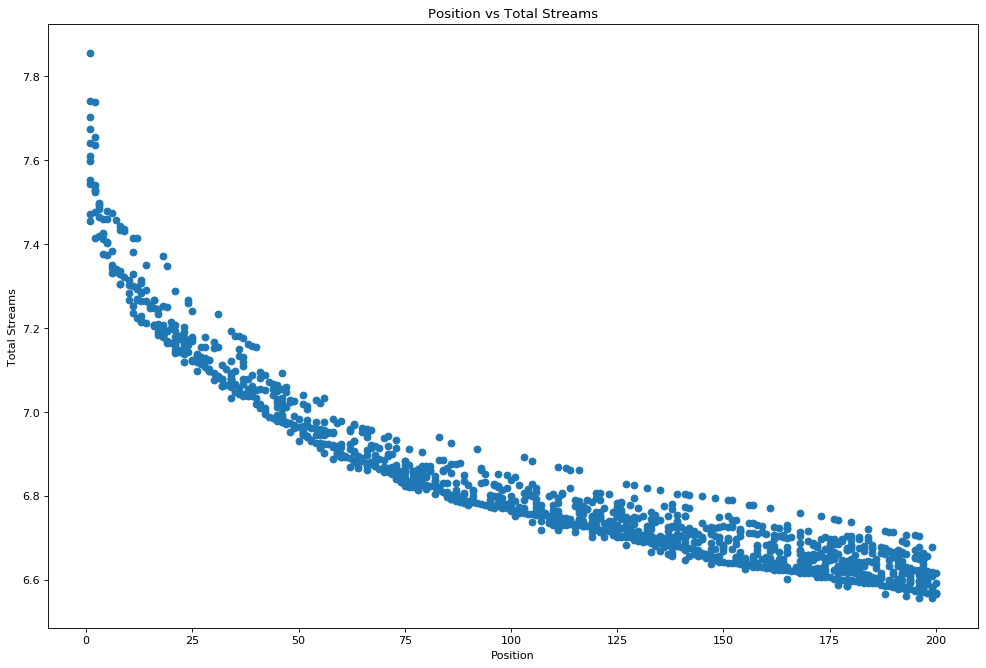

In [29]:
#scatter plot
y = np.log10(df['Streams'])
x = df['Position']
plt.figure(figsize=(15, 10), dpi=80)
plt.ylabel("Total Streams",)
plt.xlabel("Position")
plt.title("Position vs Total Streams")
plt.scatter(x,y)
ranking = plt.gcf()

#correlation
positioncorrelation = np.corrcoef(x,y)[0,1]
print("Position correlation:", positioncorrelation)

Evidently, there is a strong negative correlation between a song's position on the Spotify chart, and the total number of streams that it has. This is expected and matched our predictions because the ranking of songs on the chart is solely based on the number of streams that it has accumulated throughout the past week. Also, it is noteworthy that a larger quantity of songs within the top 200 chart have a lower amount of streams, as seen by the concentration of data points near the bottom right part of the scatter plot. One likely reason for this is that we removed duplicates, which often tended to be songs with larger total streams and a numerically lower position on the chart.

## Acousticness

In [30]:
def check_p_val(p_val, alpha):

    if p_val < alpha:
        print("We have evidence to reject the null hypothesis. It's significantly different.")
    else:
        print("We do not have evidence to reject the null hypothesis. It's not significantly different.")

<Figure size 1200x800 with 0 Axes>

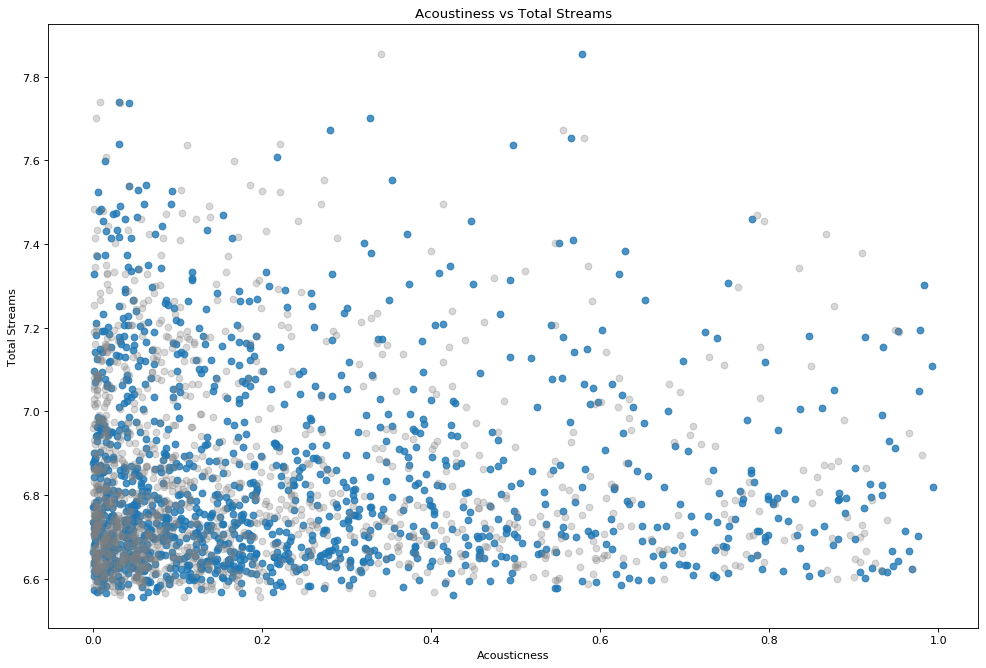

Old acousticness correlation: -0.118067031927
Current acousticness correlation: -0.03015308953292686
t_val: -7.428503527417313
p_val: 1.3486371258313932e-13
We have evidence to reject the null hypothesis. It's significantly different.


<Figure size 432x288 with 0 Axes>

In [31]:
#scatter plot
plt.figure(figsize=(15, 10), dpi=80)

#get current data
x = df['acousticness']
y = np.log10(df['Streams'])

#get old data
x_old = df_old['acousticness']
y_old = np.log10(df_old['Total'] *(df['Streams'] / df_old['Total']))

#set plot attributes
plt.figure(figsize=(15, 10), dpi=80)
plt.ylabel("Total Streams")
plt.xlabel("Acousticness")
plt.title("Acoustiness vs Total Streams")

#plot data
plt.scatter(x,y, alpha = .8, label = 'Recent')
plt.scatter(x = x_old, y = y_old, c='grey', alpha = 0.3, label = '2015-')
plt.show()
acousticness = plt.gcf()

#old correlation
print("Old acousticness correlation: -0.118067031927")

#current correlation
acoucorrelation = np.corrcoef(x,y)[0,1]
print("Current acousticness correlation:", acoucorrelation)

# Scale the values
scaled_x = df['Streams'] * df['acousticness']
old_scaled_x = df_old['Total'] * df_old['acousticness']

# Get T-values 
t_val = stats.ttest_ind(scaled_x, old_scaled_x)[0]
p_val = stats.ttest_ind(scaled_x, old_scaled_x)[1]


print('t_val:', t_val)
print('p_val:', p_val)
check_p_val(p_val, alpha=0.01)

Overall, the overlaid graphs appear rather similar. However, the correlation that we found, -0.03 is 0.088 more than the previous group's correlation, -0.118. This indicates that the acousticness of popular songs within the past year has a weaker negative correlation with number of streams as compared to previous years. Moreover, the ks test indicates that the difference between the two distributions is statistically significant. The graph also indicates that the majority of songs have a low acousticness value, but there are a significant amount of outliers, meaning that there are a sizable amount of popular songs which are acoustic. 

Old acousticness mean: 0.2218695522772276
Current acousticness mean: 0.2357710769110762
Current acousticness standard deviation: 0.24388709404835657


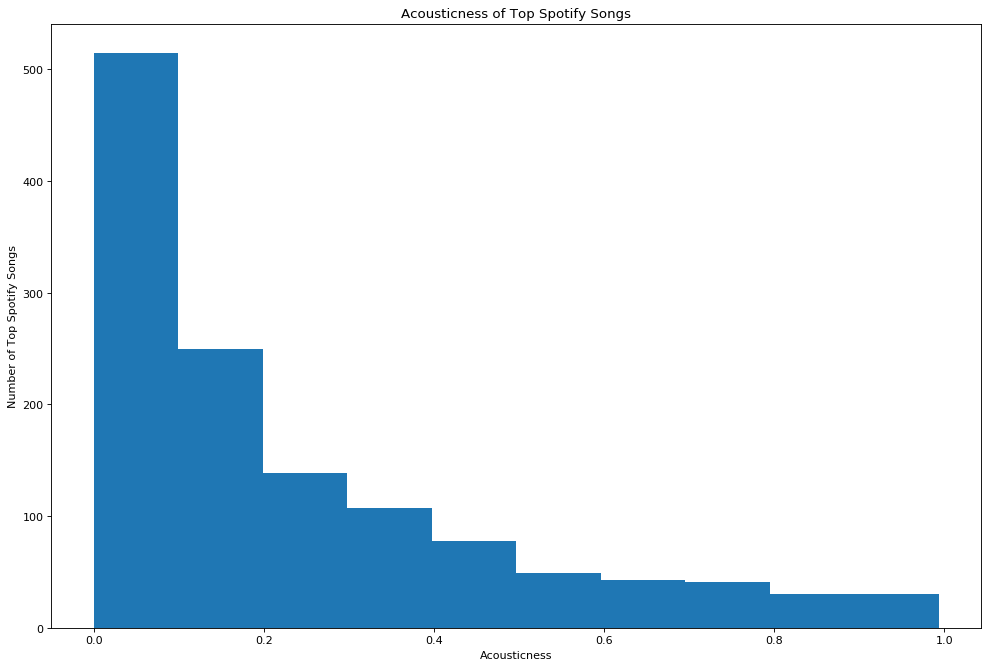

In [32]:
plt.figure(figsize=(15, 10), dpi=80)
plt.hist(df['acousticness'])
plt.xlabel('Acousticness')
plt.ylabel('Number of Top Spotify Songs')
plt.title('Acousticness of Top Spotify Songs')
print("Old acousticness mean:", df_old['acousticness'].mean())
print("Current acousticness mean:", df['acousticness'].mean())
print("Current acousticness standard deviation:", df['acousticness'].std())

This graph demonstrates that the majority of songs in the top 200 chart have a low acousticness value. Moreover, this graph reveals that the majority of songs have an acousticness value of 0.0 - 0.3. Based on this information, we can conclude that the more popular songs streamed on Spotify tend to have less acousticness. Seeing as our mean was 0.015 larger than the previous groups and that the t-test found that the difference between the two distributions is statistically significant, we can conclude that popular songs streamed within the past year on Spotify are slightly more acoustic than they were in previous years.

## Danceability

<Figure size 1200x800 with 0 Axes>

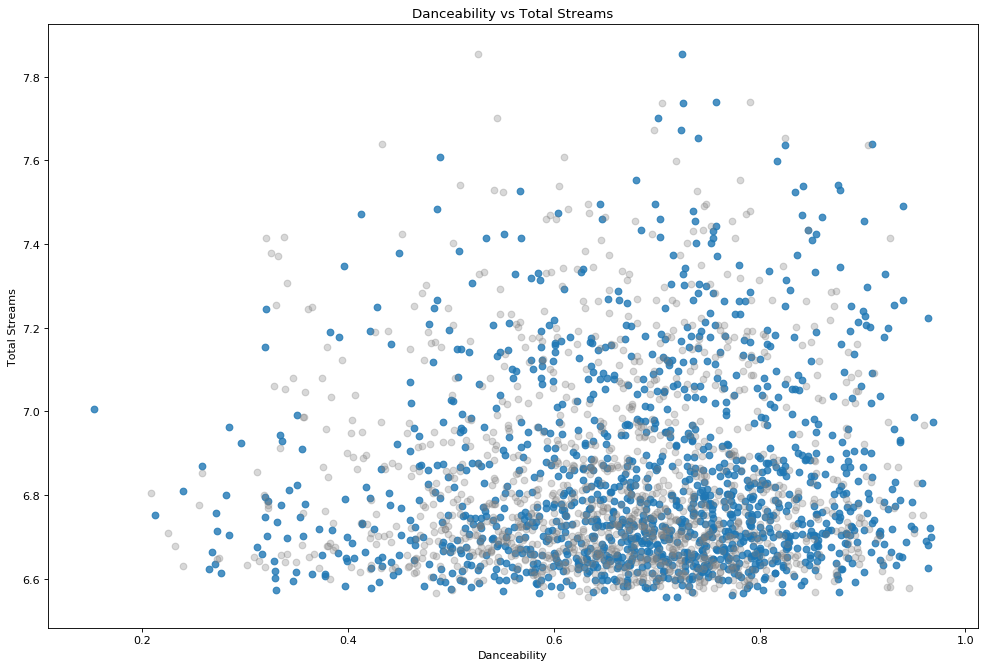

Old danceability correlation: 0.210059644348
Current danceability correlation: 0.06471145015954458
t_val: -12.850991936444418
p_val: 4.9501068592483734e-37
We have evidence to reject the null hypothesis. It's significantly different.


<Figure size 432x288 with 0 Axes>

In [33]:
#scatter plot
plt.figure(figsize=(15, 10), dpi=80)

#get current data
x = df['danceability']
y = np.log10(df['Streams'])

#get old data
x_old = df_old['danceability']
y_old = np.log10(df_old['Total'] *(df['Streams'] / df_old['Total']))

#set plot attributes
plt.figure(figsize=(15, 10), dpi=80)
plt.ylabel("Total Streams")
plt.xlabel("Danceability")
plt.title("Danceability vs Total Streams")

#plot data
plt.scatter(x,y, alpha = .8,)
plt.scatter(x = x_old, y = y_old, c='grey', alpha = 0.3)
plt.show()
danceability = plt.gcf()

#old correlation
print("Old danceability correlation: 0.210059644348")

#current correlation
dancecorrelation = np.corrcoef(x,y)[0,1]
print("Current danceability correlation:", dancecorrelation)

# Scale the values
scaled_x = df['Streams'] * df['danceability']
old_scaled_x = df_old['Total'] * df_old['danceability']

# Get T-values 
t_val = stats.ttest_ind(scaled_x, old_scaled_x)[0]
p_val = stats.ttest_ind(scaled_x, old_scaled_x)[1]


print('t_val:', t_val)
print('p_val:', p_val)
check_p_val(p_val, alpha=0.01)

The overlaid graphs appear similar at first. Interestingly, the correlation value was 0.14 less than the previous group's, even though the mean (calculated below) was substantially larger. This indicates that even though there was a weaker positive correlation between danceability values and number of streams, danceability values were overall higher within the last year as compared to previous years. This could also indicate that top-ranked songs on the charts less "danceable" than lesser-ranked songs. The t-test confirms that the difference between the two distributions is statistically significant. 

Old danceability mean: 0.6256689108910878
Danceability mean: 0.6901185647425898


Text(0.5, 1.0, 'Danceability of Top Spotify Songs')

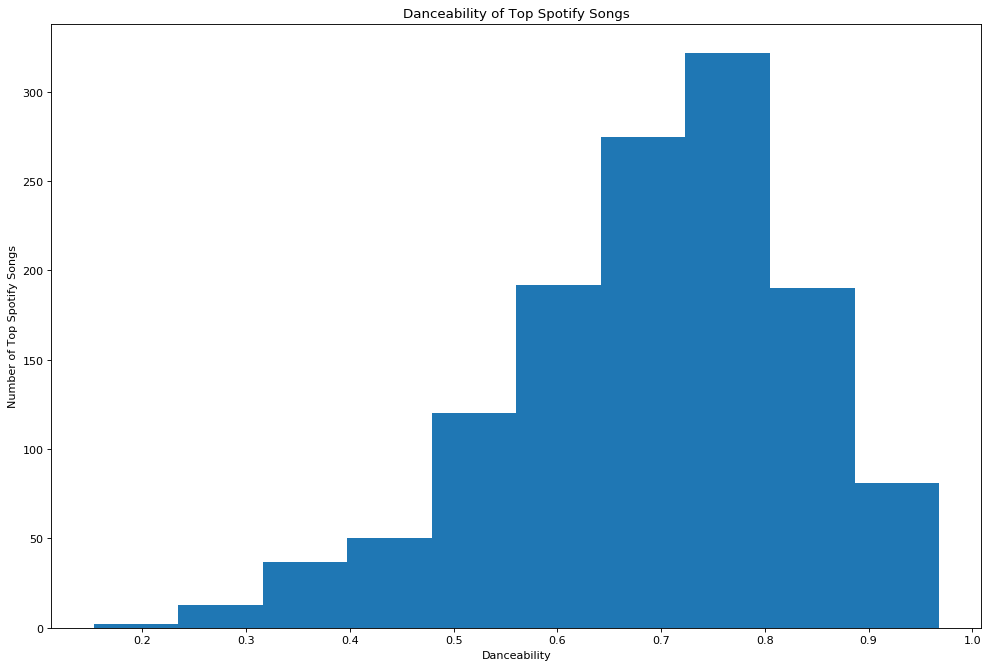

In [34]:
print("Old danceability mean:", df_old['danceability'].mean())
print("Danceability mean:", df['danceability'].mean())
plt.figure(figsize=(15, 10), dpi=80)
plt.hist(df['danceability'])
plt.xlabel('Danceability')
plt.ylabel('Number of Top Spotify Songs')
plt.title('Danceability of Top Spotify Songs')

Unlike acousticness, danceability clearly has a positive correlation with a song's ranking on the chart, and the majority of songs in the top 200 have a danceability value between 0.6 and 0.9. This confirms our prediction that more popular songs have higher danceability values. Compared to the past project, which had a danceability mean of 0.63, our danceability mean was 0.69, which is 0.06 larger. Based on this result and the results of the t-test, we can conclude that songs in the top charts for the past year have been more "danceable" than those of previous years. 

## Duration

<Figure size 1200x800 with 0 Axes>

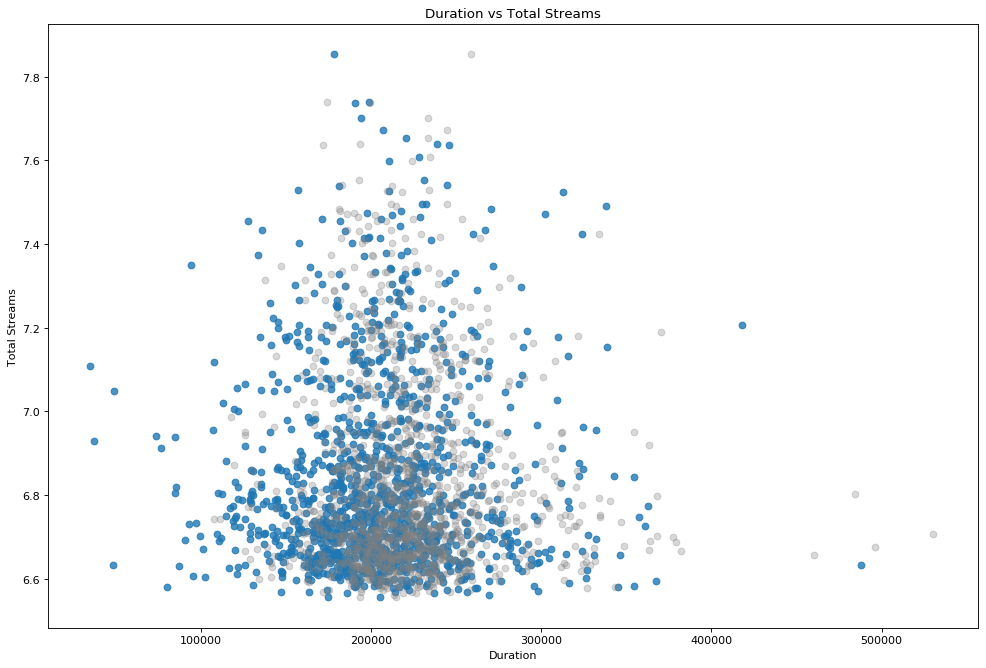

Current duration correlation: 0.026327219481134936
t_val: -13.444983808159005
p_val: 2.702577786094495e-40
We have evidence to reject the null hypothesis. It's significantly different.


<Figure size 432x288 with 0 Axes>

In [35]:
#scatter plot
plt.figure(figsize=(15, 10), dpi=80)

#get current data
x = df['duration_ms']
y = np.log10(df['Streams'])

#get old data
x_old = df_old['duration_ms']
y_old = np.log10(df_old['Total'] *(df['Streams'] / df_old['Total']))

#set plot attributes
plt.figure(figsize=(15, 10), dpi=80)
plt.ylabel("Total Streams")
plt.xlabel("Duration")
plt.title("Duration vs Total Streams")

#plot data
plt.scatter(x,y, alpha = .8,)
plt.scatter(x = x_old, y = y_old, c='grey', alpha = 0.3)
plt.show()
duration = plt.gcf()

#current correlation
durationcorrelation = np.corrcoef(x,y)[0,1]
print("Current duration correlation:", durationcorrelation)

# scaled x and x_old
scaled_x = df['duration_ms'] * df['Streams']
scaled_x_old = df_old['duration_ms'] * df_old['Total']

# Get T-values 
t_val = stats.ttest_ind(scaled_x, scaled_x_old)[0]
p_val = stats.ttest_ind(scaled_x, scaled_x_old)[1]


print('t_val:', t_val)
print('p_val:', p_val)
check_p_val(p_val, alpha=0.01)

Looking closely at the scatter plots reveals a greater concentration of grey points (old data) above 200,000 milliseconds, and a greater concentration of blue points (current data) below 200,00 milliseconds. The calculations of the means below quantifies this difference. The variability between the two plots appears to be similar, and both plots have several outliers around 400,000 and 500,000 milliseconds. 

Old duration mean: 223686.6102970297
Duration mean: 204419.4336973479
Duration standard deviation: 46133.3374041249
Normal Test Statistic: 120.0776477499585
Normal Test P-value: 8.423063817326593e-27


Text(0.5, 1.0, 'Duration of Top Spotify Songs')

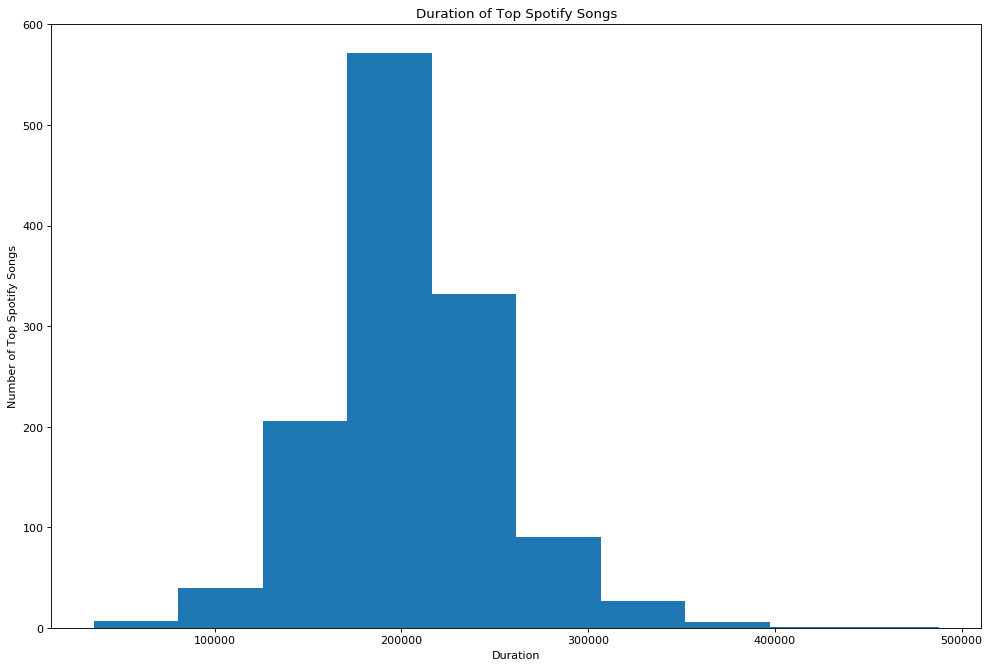

In [36]:
print("Old duration mean:", df_old['duration_ms'].mean())
print("Duration mean:", df['duration_ms'].mean())
print("Duration standard deviation:", df['duration_ms'].std())
st_duration_ms = stats.normaltest(df['duration_ms'])[0]
p_duration_ms = stats.normaltest(df['duration_ms'])[1]
print("Normal Test Statistic:", st_duration_ms)
print("Normal Test P-value:", p_duration_ms)
plt.figure(figsize=(15, 10), dpi=80)
plt.hist(df['duration_ms'])
plt.xlabel('Duration')
plt.ylabel('Number of Top Spotify Songs')
plt.title('Duration of Top Spotify Songs')

The mean of the duration of songs in the top 200 is 204419 milliseconds, or 3 minutes and 24 seconds, while the previous group's mean is 223686 milliseconds, or 3 minutes and 44 seconds. Our standard deviation is 46133 milliseconds, or 46.1 seconds. Evidently, the mean of songs within the past year was 20 seconds shorter than previous years. The t-test performed concludes that the difference between the two distributions is statistically significant, and therefore we can conclude that more recent popular songs on Spotify are significantly shorter in duration.

## Instrumentalness

<Figure size 1200x800 with 0 Axes>

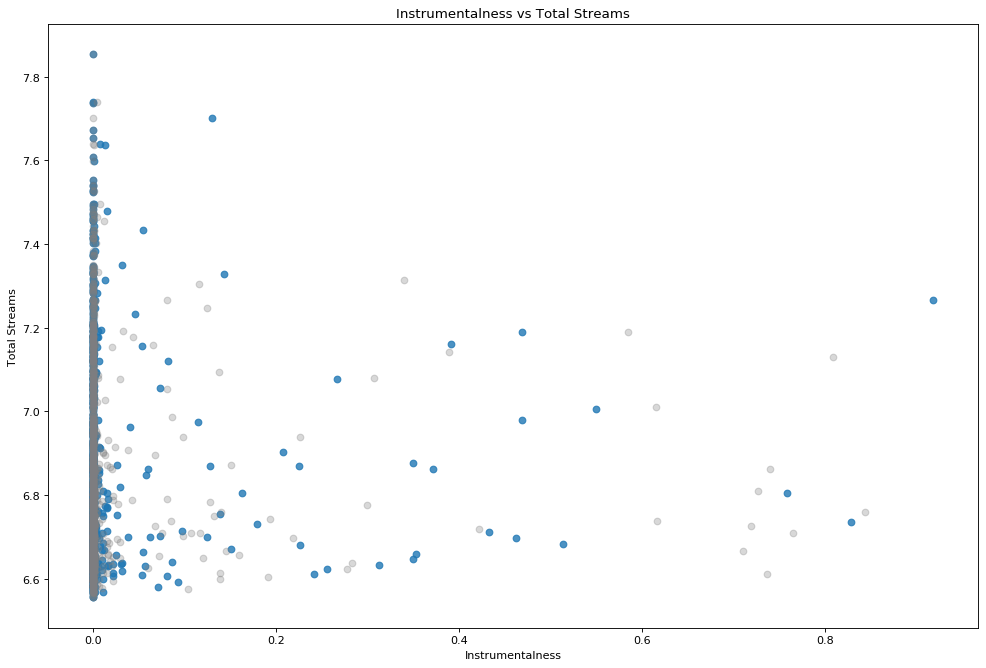

Old instrumentalness correlation: -0.114765160776
Current instrumentalness correlation: 0.023056316789432693
t_val: -2.4845713161530427
p_val: 0.013013438069207676
We do not have evidence to reject the null hypothesis. It's not significantly different.


<Figure size 432x288 with 0 Axes>

In [37]:
#scatter plot
plt.figure(figsize=(15, 10), dpi=80)

#get current data
x = df['instrumentalness']
y = np.log10(df['Streams'])

#get old data
x_old = df_old['instrumentalness']
y_old = np.log10(df_old['Total'] *(df['Streams'] / df_old['Total']))

#set plot attributes
plt.figure(figsize=(15, 10), dpi=80)
plt.ylabel("Total Streams")
plt.xlabel("Instrumentalness")
plt.title("Instrumentalness vs Total Streams")

#plot data
plt.scatter(x,y, alpha = .8,)
plt.scatter(x = x_old, y = y_old, c='grey', alpha = 0.3)
plt.show()
instrumentalness = plt.gcf()

#old correlation
print("Old instrumentalness correlation: -0.114765160776")

#current correlation
instrumentalnesscorrelation = np.corrcoef(x,y)[0,1]
print("Current instrumentalness correlation:", instrumentalnesscorrelation)

# scaled x and x_old
scaled_x = df['instrumentalness'] * df['Streams']
scaled_x_old = df_old['instrumentalness'] * df_old['Total']

# Get T-values 
t_val = stats.ttest_ind(scaled_x, scaled_x_old)[0]
p_val = stats.ttest_ind(scaled_x, scaled_x_old)[1]


print('t_val:', t_val)
print('p_val:', p_val)
check_p_val(p_val, alpha=0.01)

The scatter plot shows the vast majority of songs, across both datasets, concentrated at and near 0.0 instrumentalness. However, across both datasets, there are also a sizable amount of outliers from 0.1 to 0.9 instrumentalness, which indicates that there are a few top-ranked songs on Spotify which do not contain vocals or have minimal vocal presence. The old instrumentalness correlation was negative, which indicated that a small correlation between streams and minimal vocal presence, but the current instrumentalness correlation is close to 0. The t-test indicates that the difference between the two distributions is not statistically significant. 

Old instrumentalness mean: 0.021853457453465366
Instrumentalness mean: 0.009569215046801869


Text(0.5, 1.0, 'Instrumentalness of Top Spotify Songs')

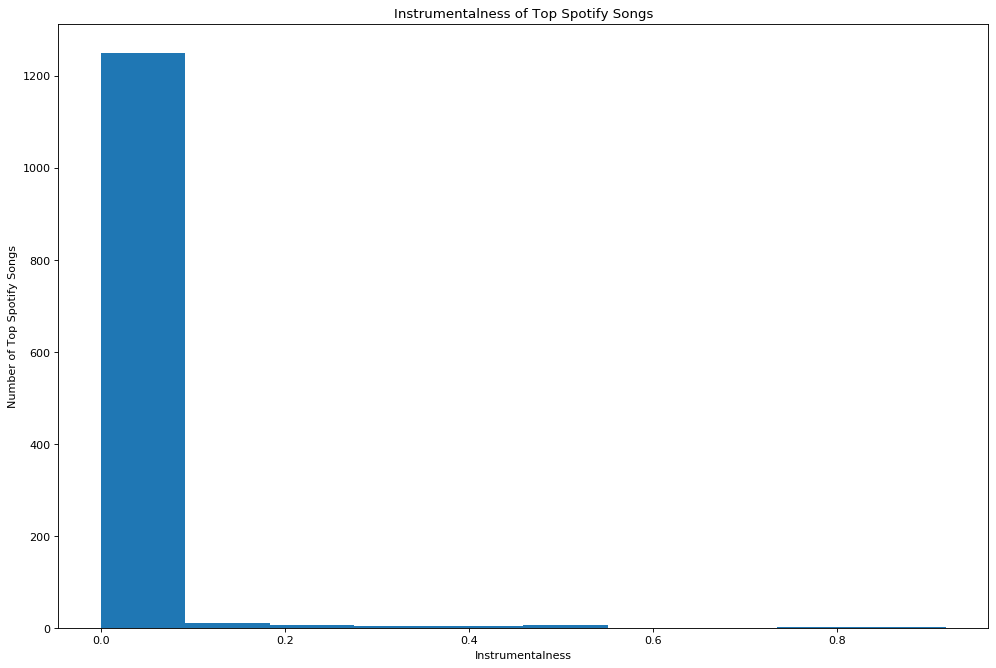

In [38]:
print("Old instrumentalness mean:", df_old['instrumentalness'].mean())
print("Instrumentalness mean:", df['instrumentalness'].mean())
plt.figure(figsize=(15, 10), dpi=80)
plt.hist(df['instrumentalness'])
plt.xlabel('Instrumentalness')
plt.ylabel('Number of Top Spotify Songs')
plt.title('Instrumentalness of Top Spotify Songs')

This graph reveals that the vast majority of songs in the top charts have instrumentalness values of 0 or close to 0. This means that the vast majority of songs have vocals present within them. The mean for instrumentalness was 0.009, which is ~0.01 less than the previous groups' findings, which was 0.021. This is a very minimal difference and the results of the t-test lead us to conclude that there was no significant difference between instrumentalness values between the two datasets. 

## Energy

<Figure size 1200x800 with 0 Axes>

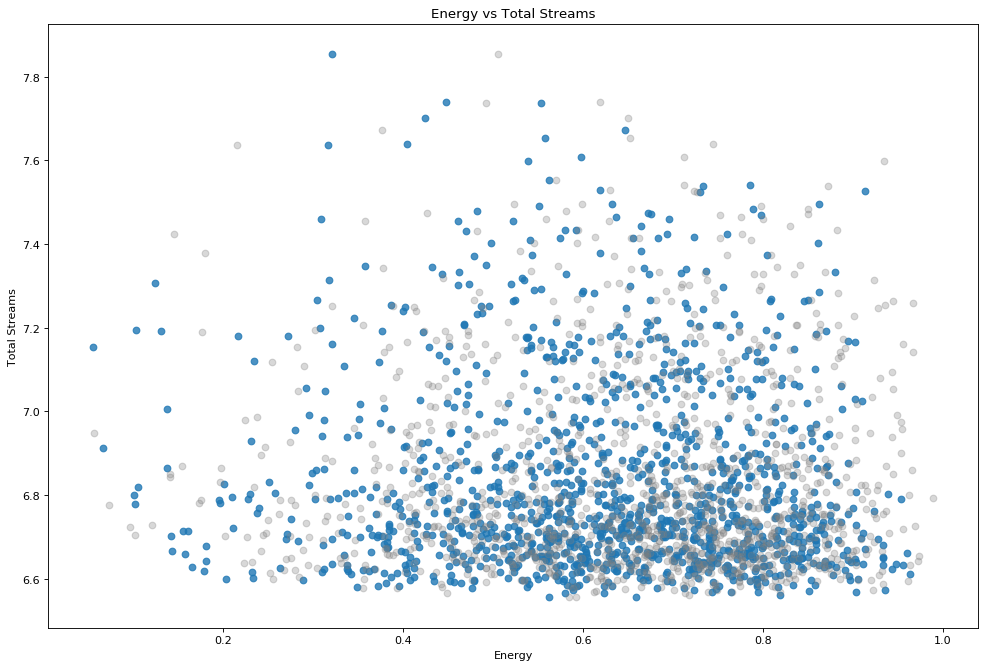

Old energy correlation: 0.0647662505139
Current energy correlation: -0.06564415344398836
t_val: -13.2717911455457
p_val: 2.4937650430541652e-39
We have evidence to reject the null hypothesis. It's significantly different.


<Figure size 432x288 with 0 Axes>

In [39]:
#scatter plot
plt.figure(figsize=(15, 10), dpi=80)

#get current data
x = df['energy']
y = np.log10(df['Streams'])

#get old data
x_old = df_old['energy']
y_old = np.log10(df_old['Total'] *(df['Streams'] / df_old['Total']))

#set plot attributes
plt.figure(figsize=(15, 10), dpi=80)
plt.ylabel("Total Streams")
plt.xlabel("Energy")
plt.title("Energy vs Total Streams")

#plot data
plt.scatter(x,y, alpha = .8,)
plt.scatter(x = x_old, y = y_old, c='grey', alpha = 0.3)
plt.show()
Energy = plt.gcf()

#old correlation
print("Old energy correlation: 0.0647662505139")

#current correlation
energycorrelation = np.corrcoef(x,y)[0,1]
print("Current energy correlation:", energycorrelation)

# scaled x and x_old
scaled_x = df['energy'] * df['Streams']
scaled_x_old = df_old['energy'] * df_old['Total']

# Get T-values 
t_val = stats.ttest_ind(scaled_x, scaled_x_old)[0]
p_val = stats.ttest_ind(scaled_x, scaled_x_old)[1]


print('t_val:', t_val)
print('p_val:', p_val)
check_p_val(p_val, alpha=0.01)

The overlaid energy distributions overall appear quite similar. The majority of songs across both datasets have an energy value between 0.4 and 0.9. However, there are some outliers with energy values close to 0.1 and 1.0. While the old data had a correlation of 0.06, the current data has a correlation of -0.06. Though the difference between the correlations are substantial, 0.1, the correlations themselves are quite weak. The results of the t-test indicate that the differences between the two datasets are statistically significant. 

Old energy mean: 0.6426865346534671
Current energy mean: 0.6266278471138843
Old energy standard deviation: 0.19618113753648744
Current energy standard deviation: 0.16821798081003358
Normal Test Statistic: 58.92401086232249
Normal Test P-value: 1.6025574794185588e-13


Text(0.5, 1.0, 'Energy of Top Spotify Songs')

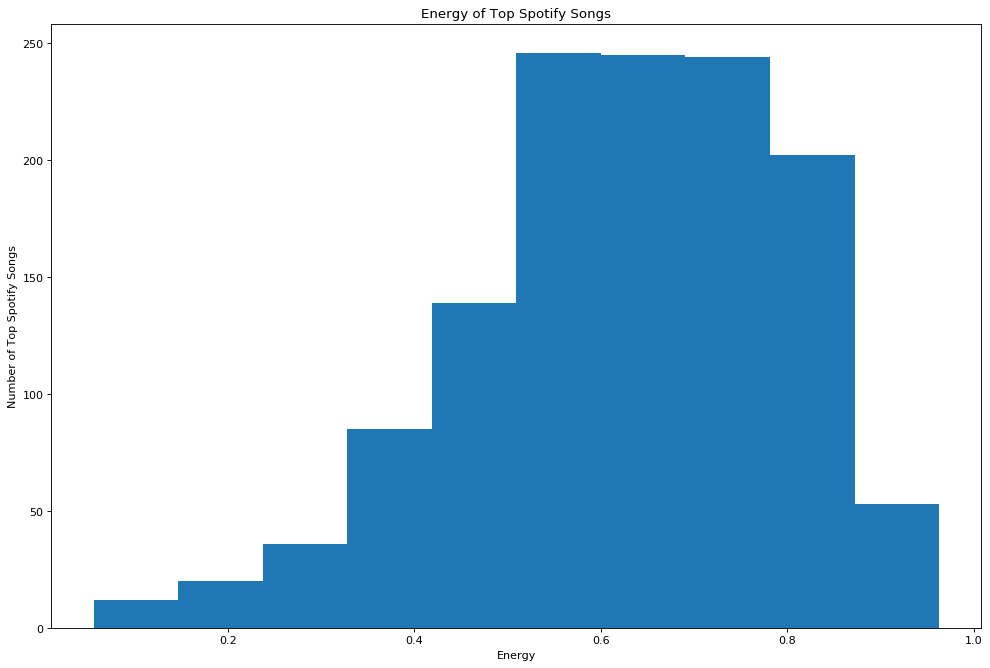

In [40]:
print("Old energy mean:", df_old['energy'].mean())
print("Current energy mean:", df['energy'].mean())
print("Old energy standard deviation:", df_old['energy'].std())
print("Current energy standard deviation:", df['energy'].std())
st_energy = stats.normaltest(df['energy'])[0]
p_energy = stats.normaltest(df['energy'])[1]
print("Normal Test Statistic:", st_energy)
print("Normal Test P-value:", p_energy)
plt.figure(figsize=(15, 10), dpi=80)
plt.hist(df['energy'])
plt.xlabel('Energy')
plt.ylabel('Number of Top Spotify Songs')
plt.title('Energy of Top Spotify Songs')

This graph shows that the majority of songs have energy values around 0.4 to 0.8, which are on the higher side. This finding matches our prediction that highly ranked songs tend to have higher energy. Our mean, 0.626, is 0.016 less than the previous group's mean, 0.642. This disproves our prediction that current popular songs on Spotify have higher energy compared to previous years. The statistically significant difference that the t-test found could be related to the differences in variance; we found that the current standard devation 0.168, was about 0.03 less than the old standard deviation of 0.196. 

## Musical Key

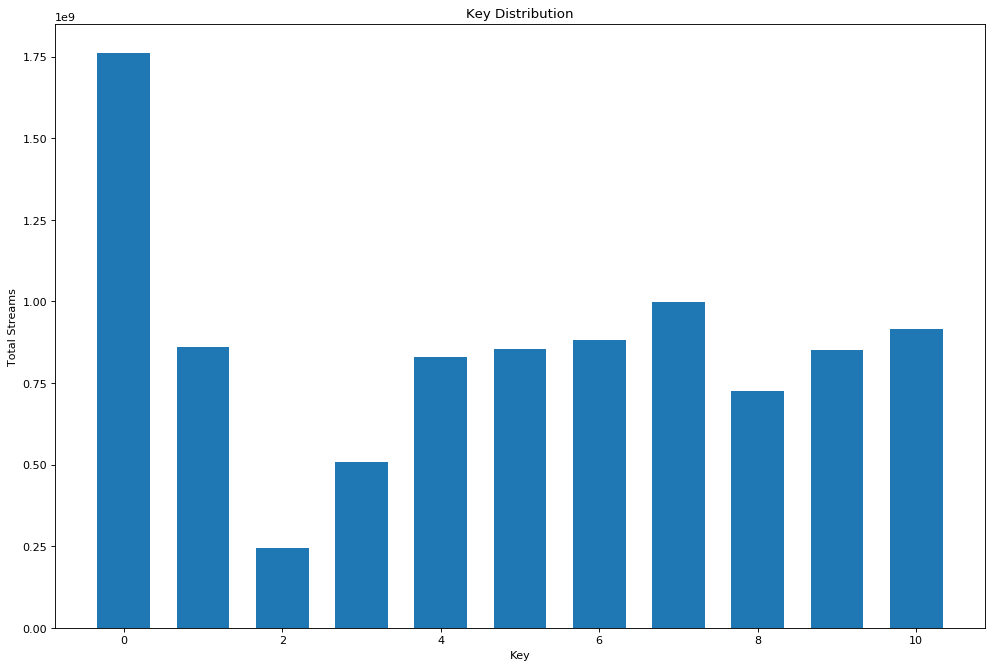

In [41]:
#using old's group's code to maintain consistency across our comparisons
#accumulating the number of total streams per key
df_key0 = df[df['key']==0]
key0 = df_key0['Streams'].sum()

df_key1 = df[df['key']==1]
key1 = df_key1['Streams'].sum()

df_key2 = df[df['key']==2]
key2 = df_key2['Streams'].sum()

df_key3 = df[df['key']==3]
key3 = df_key3['Streams'].sum()

df_key4 = df[df['key']==4]
key4 = df_key4['Streams'].sum()

df_key5 = df[df['key']==5]
key5 = df_key5['Streams'].sum()

df_key6 = df[df['key']==6]
key6 = df_key6['Streams'].sum()

df_key7 = df[df['key']==7]
key7 = df_key7['Streams'].sum()

df_key8 = df[df['key']==8]
key8 = df_key8['Streams'].sum()

df_key9 = df[df['key']==9]
key9 = df_key9['Streams'].sum()

df_key10 = df[df['key']==10]
key10 = df_key10['Streams'].sum()

df_key11 = df[df['key']==11]
key11 = df_key11['Streams'].sum()

df_key11 = df[df['key']==11]
key11 = df_key11['Streams'].sum()


#graph
keys = [key1, key2, key3, key4, key5, key6, key7, key8, key9, key10, key11]
N = len(keys)
x = range(N)
width = 1/1.5
plt.figure(figsize=(15, 10), dpi=80)
plt.bar(x, keys, width)
plt.ylabel("Total Streams")
plt.xlabel("Key")
plt.title("Key Distribution")


key = plt.gcf()

Like the previous groups' findings, we found that a large amount of streams are songs that use the key of C (0) and a small amount of streams are songs that use the key of D (2). Unlike the previous group's findings, we found a substantially smaller proportion of streams that use the keys D#, E♭ (3) and a substantially larger proportion of streams that use the key of A (9). The proportions of the rest of the keys are similar to the results of the previous dataset. 

## Liveness

<Figure size 1200x800 with 0 Axes>

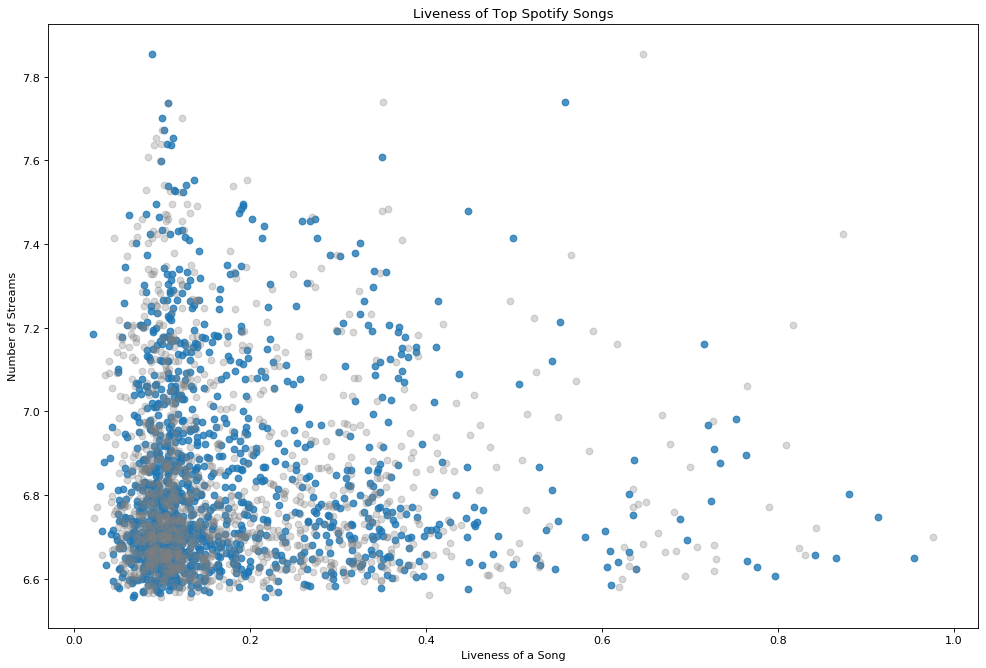

Old liveness correlation: -0.0422913327115
Current liveness correlation: 0.0038182938719787097
t_val: -10.510310642956197
p_val: 1.7248399578648513e-25
We have evidence to reject the null hypothesis. It's significantly different.


<Figure size 432x288 with 0 Axes>

In [42]:
#scatter plot
plt.figure(figsize=(15, 10), dpi=80)

#get current data
x = df['liveness']
y = np.log10(df['Streams'])

#get old data
x_old = df_old['liveness']
y_old = np.log10(df_old['Total'] *(df['Streams'] / df_old['Total']))

#set plot attributes
plt.figure(figsize=(15, 10), dpi=80)
plt.title('Liveness of Top Spotify Songs')
plt.xlabel('Liveness of a Song')
plt.ylabel('Number of Streams')

#plot data
plt.scatter(x,y, alpha = .8,)
plt.scatter(x = x_old, y = y_old, c='grey', alpha = 0.3)

plt.show()

liveness = plt.gcf()

#old correlation
print("Old liveness correlation: -0.0422913327115")

#current correlation
livenesscorrelation = np.corrcoef(x,y)[0,1]
print("Current liveness correlation:", livenesscorrelation)

# scaled x and x_old
scaled_x = df['liveness'] * df['Streams']
scaled_x_old = df_old['liveness'] * df_old['Total']

# Get T-values 
t_val = stats.ttest_ind(scaled_x, scaled_x_old)[0]
p_val = stats.ttest_ind(scaled_x, scaled_x_old)[1]


print('t_val:', t_val)
print('p_val:', p_val)
check_p_val(p_val, alpha=0.01)

This graph overlay reveals that the majority of streamed songs have a liveliness values of from 0.1 to 0.4, with the vast majority of songs around 0.1. There are a significant amount of outliers from 0.4 to 1.0, which indicate that there are top-ranked songs on Spotify which do have a live audience detected within the track. The current correlation, 0.00, is 0.04 more than the previous correlation, -0.04, however they are both indicate weak correlations between liveness and streams. The t-test indicated that there is a significant difference between the two distributions.

Old liveness mean: 0.18413687128712924
Current liveness mean: 0.17349695787831515
Old liveness standard deviation: 0.1427585502437708
Current liveness standard deviation: 0.1290944696967032


Text(0.5, 1.0, 'Liveness of Top Spotify Songs')

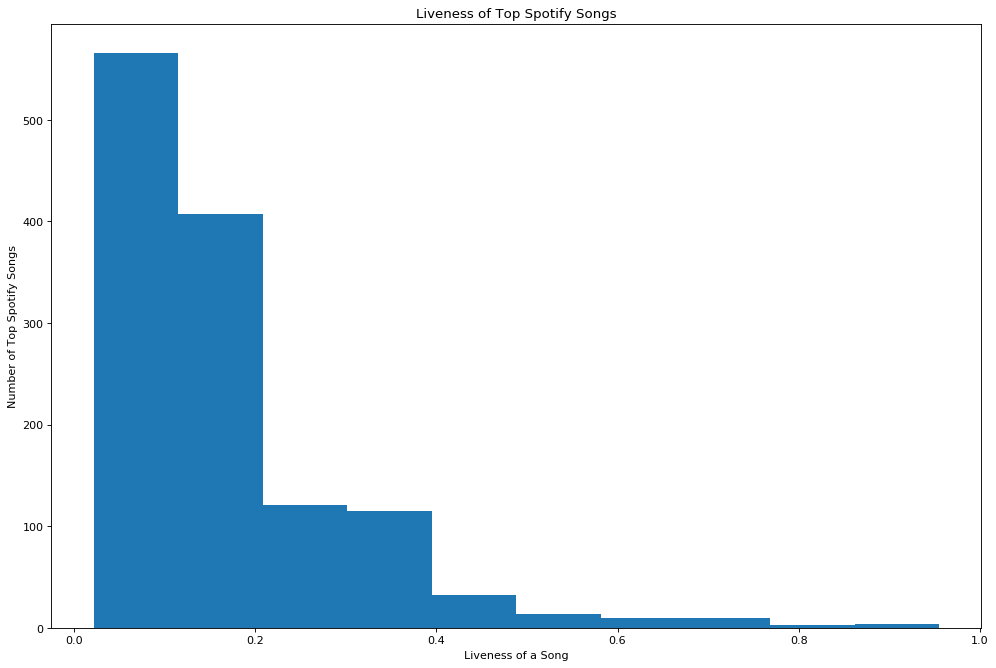

In [43]:
print("Old liveness mean:", df_old['liveness'].mean())
print("Current liveness mean:", df['liveness'].mean())
print("Old liveness standard deviation:", df_old['liveness'].std())
print("Current liveness standard deviation:", df['liveness'].std())
plt.figure(figsize=(15, 10), dpi=80)
plt.hist(df['liveness'])
plt.xlabel('Liveness of a Song')
plt.ylabel('Number of Top Spotify Songs')
plt.title('Liveness of Top Spotify Songs')

This graph demonstrates that a small quantity of songs within the top charts have an audience detected within the recording. The majority of songs have liveness values ranging from 0.0 to 0.4, with the vast majority of songs at around 0.1. The mean of liveness value 0.173, which is 0.012 smaller than the previous groups' mean, 0.185. Because the difference between means is so minimal, we are unable to conclude that there is a significant difference between liveness values of the two datasets. 

## Loudness

<Figure size 1200x800 with 0 Axes>

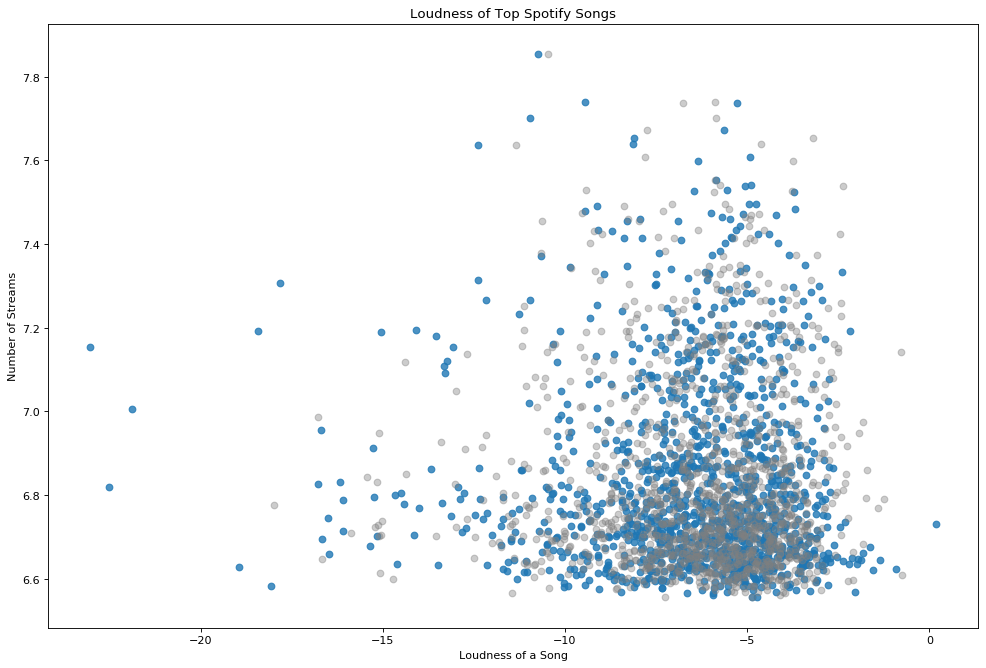

Old loudness correlation: 0.166771662843
Current loudness correlation: -0.04274663867398577
t_val: 12.646524323184906
p_val: 6.122262251661012e-36
We have evidence to reject the null hypothesis. It's significantly different.


<Figure size 432x288 with 0 Axes>

In [44]:
#scatter plot
plt.figure(figsize=(15, 10), dpi=80)

#get current data
x = df['loudness']
y = np.log10(df['Streams'])

#get old data
x_old = df_old['loudness']
y_old = np.log10(df_old['Total'] *(df['Streams'] / df_old['Total']))

#set plot attributes
plt.figure(figsize=(15, 10), dpi=80)
plt.title('Loudness of Top Spotify Songs')
plt.xlabel('Loudness of a Song')
plt.ylabel('Number of Streams')

#plot data
plt.scatter(x,y, alpha = .8,)
plt.scatter(x = x_old, y = y_old, c='grey', alpha = 0.4)
plt.show()

loudness = plt.gcf()

#old correlation
print("Old loudness correlation: 0.166771662843")

#current correlation
loudnesscorrelation = np.corrcoef(x,y)[0,1]
print("Current loudness correlation:", loudnesscorrelation)

# scaled x and x_old
scaled_x = df['loudness'] * df['Streams']
scaled_x_old = df_old['loudness'] * df_old['Total']

# Get T-values 
t_val = stats.ttest_ind(scaled_x, scaled_x_old)[0]
p_val = stats.ttest_ind(scaled_x, scaled_x_old)[1]


print('t_val:', t_val)
print('p_val:', p_val)
check_p_val(p_val, alpha=0.01)

This graph overlay indicates that the majority of songs throughout both datasets have loudness values beween -3 and -10 dB. Interestingly, the old loudness correlation was 0.16 while the current loudness correlation is -0.04, which indicates a significantly smaller correlation between loudness and streams. The t-test indicates that the difference between the two distribution is statistically significant. 

Old loudness mean: -6.734235247524771
Loudness mean: -6.474582683307341
Loudness standard deviation: 2.653078126233702
Normal Test Statistic: 449.852240425198
Normal Test P-value: 2.0693176201269214e-98


Text(0.5, 1.0, 'Loudness of Top Spotify Songs')

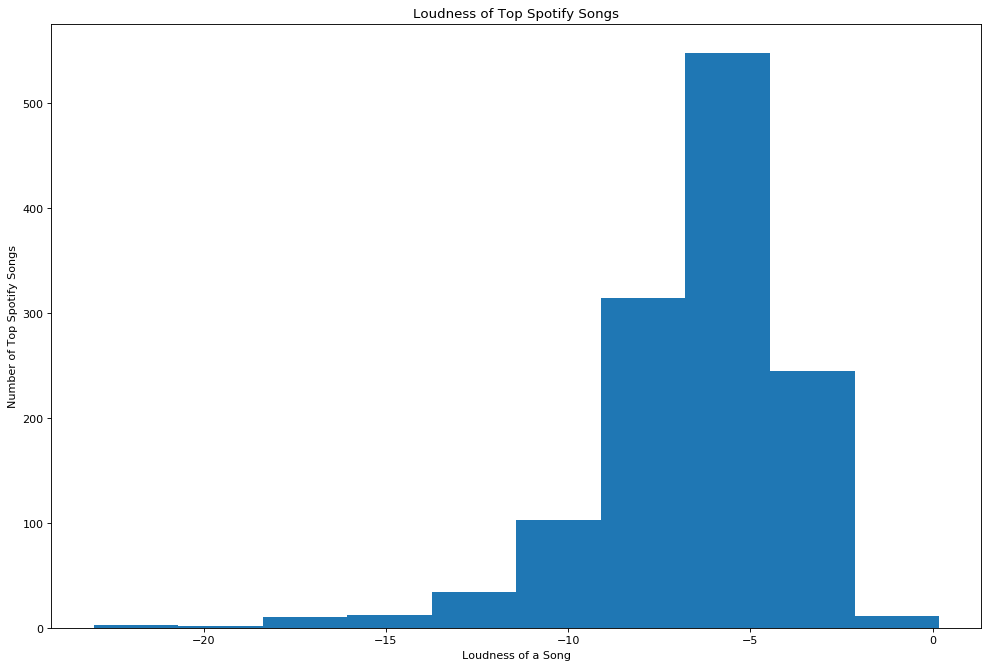

In [45]:
print("Old loudness mean:", df_old['loudness'].mean())
print("Loudness mean:", df['loudness'].mean())
print("Loudness standard deviation:", df['loudness'].std())
st_loudness = stats.normaltest(df['loudness'])[0]
p_loudness = stats.normaltest(df['loudness'])[1]
print("Normal Test Statistic:", st_loudness)
print("Normal Test P-value:", p_loudness)
plt.figure(figsize=(15, 10), dpi=80)
plt.hist(df['loudness'])
plt.xlabel('Loudness of a Song')
plt.ylabel('Number of Top Spotify Songs')
plt.title('Loudness of Top Spotify Songs')

The mean of loudness values is -6.47 dB, which a 0.26 dB more than the previous groups' mean of -6.73 dB. Taking the results of our t-test into account, we can conclude that loudness has slightly increased among top ranked songs within the past year. 

## Mode

Text(0.5, 1.0, 'Mode of Top Spotify Songs')

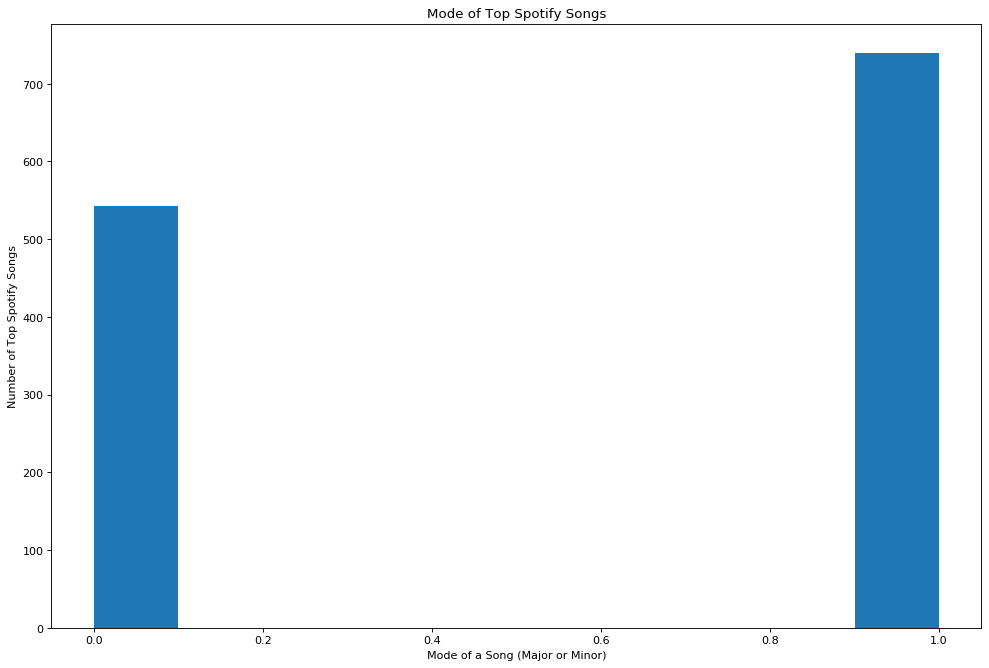

In [46]:
plt.figure(figsize=(15, 10), dpi=80)
plt.hist(df['mode'])
plt.xlabel('Mode of a Song (Major or Minor)')
plt.ylabel('Number of Top Spotify Songs')
plt.title('Mode of Top Spotify Songs')

This graph demonstrates that more songs have a major mode than a minor mode. Although the previous group did not conduct an analysis of mode, we found this difference interesting and have conducted further analyses located below to understand whether mode correlated with different musical attributes. 

## Speechiness

<Figure size 1200x800 with 0 Axes>

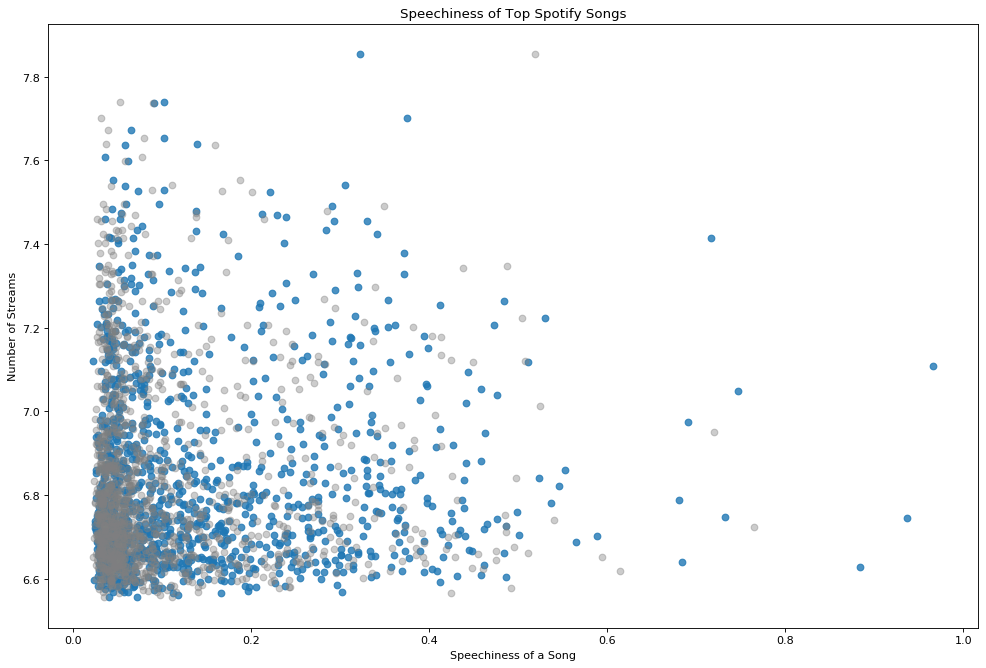

Old speechiness correlation: 0.0138286627563
Current speechiness correlation: 0.06553993709116919
t_val: -8.90919831216532
p_val: 7.811889626921423e-19
We have evidence to reject the null hypothesis. It's significantly different.


<Figure size 432x288 with 0 Axes>

In [47]:
#scatter plot
plt.figure(figsize=(15, 10), dpi=80)

#get current data
x = df['speechiness']
y = np.log10(df['Streams'])

#get old data
x_old = df_old['speechiness']
y_old = np.log10(df_old['Total'] *(df['Streams'] / df_old['Total']))

#set plot attributes
plt.figure(figsize=(15, 10), dpi=80)
plt.title('Speechiness of Top Spotify Songs')
plt.xlabel('Speechiness of a Song')
plt.ylabel('Number of Streams')

#plot data
plt.scatter(x,y, alpha = .8,)
plt.scatter(x = x_old, y = y_old, c='grey', alpha = 0.4)
plt.show()
speechiness = plt.gcf()

#old correlation
print("Old speechiness correlation: 0.0138286627563")

#current correlation
speechcorrelation = np.corrcoef(x,y)[0,1]
print("Current speechiness correlation:", speechcorrelation)

# scaled x and x_old
scaled_x = df['speechiness'] * df['Streams']
scaled_x_old = df_old['speechiness'] * df_old['Total']

# Get T-values 
t_val = stats.ttest_ind(scaled_x, scaled_x_old)[0]
p_val = stats.ttest_ind(scaled_x, scaled_x_old)[1]

print('t_val:', t_val)
print('p_val:', p_val)
check_p_val(p_val, alpha=0.01)

This graph overlay indicates that, across both datasets, popular songs tend to have lower speechiness values, meaning that there is less of a presence of speech in the track, and a larger musical presence. The vast majority of tracks are at the 0.0 - 0.1 range, and there seems to be more outliers within the current dataset as compared to the old dataset. This observation is confirmed by the standard deviation calculations below; the current dataset has higher variance (0.02 larger) than the old dataset. Moreover, there is a stronger correlation (0.05 larger) between speechiness and streams in the current dataset, which might partly be explained by the fact that the current speechiness mean is 0.04 larger than the previous dataset. 

Old speechiness mean: 0.10269453465346538
Current speechiness mean: 0.1373282371294852
Old speechiness standard deviation: 0.10797594097331213
Current speechiness standard deviation: 0.12836883936926302
Normal Test Statistic: 508.27351290430164
Normal Test P-value: 4.263919766451456e-111


Text(0.5, 1.0, 'Speechiness of Top Spotify Songs')

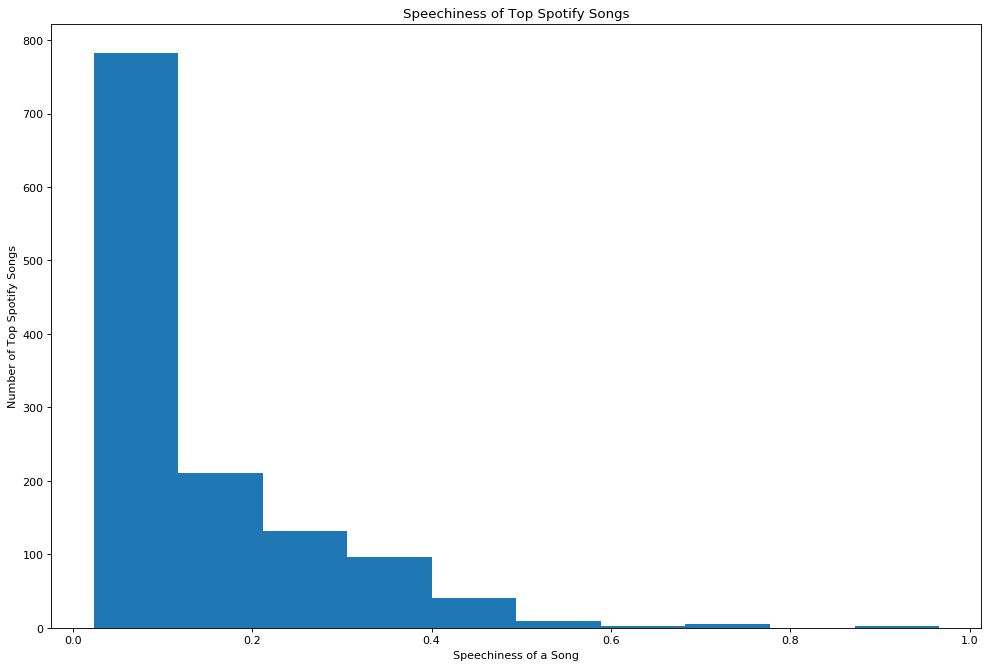

In [48]:
print("Old speechiness mean:", df_old['speechiness'].mean())
print("Current speechiness mean:", df['speechiness'].mean())
print("Old speechiness standard deviation:", df_old['speechiness'].std())
print("Current speechiness standard deviation:", df['speechiness'].std())
st_speechiness = stats.normaltest(df['speechiness'])[0]
p_speechiness = stats.normaltest(df['speechiness'])[1]
print("Normal Test Statistic:", st_speechiness)
print("Normal Test P-value:", p_speechiness)
plt.figure(figsize=(15, 10), dpi=80)
plt.hist(df['speechiness'])
plt.xlabel('Speechiness of a Song')
plt.ylabel('Number of Top Spotify Songs')
plt.title('Speechiness of Top Spotify Songs')

As a recap, the more a track sounds like speech (radio talk show or conversation) the closer the speechiness is to 1. Generally values around 0.33 to 0.66 mean that the tracks contain a combination of speech and music. Tracks under 0.33 mainly represent music. As with the scatterplot, the bar graph above indicates a majority of songs tend to have low speechiness and that most of the values tend to fall below 0.4. Based on these results, we can safely predict that having low speechiness is an attribute for popular songs. Given the difference in means as well as the t-test results, we also conclude that speechiness is slightly more popular within the past year as compared to previous years, which concurs with our prediction.

## Valence

<Figure size 1200x800 with 0 Axes>

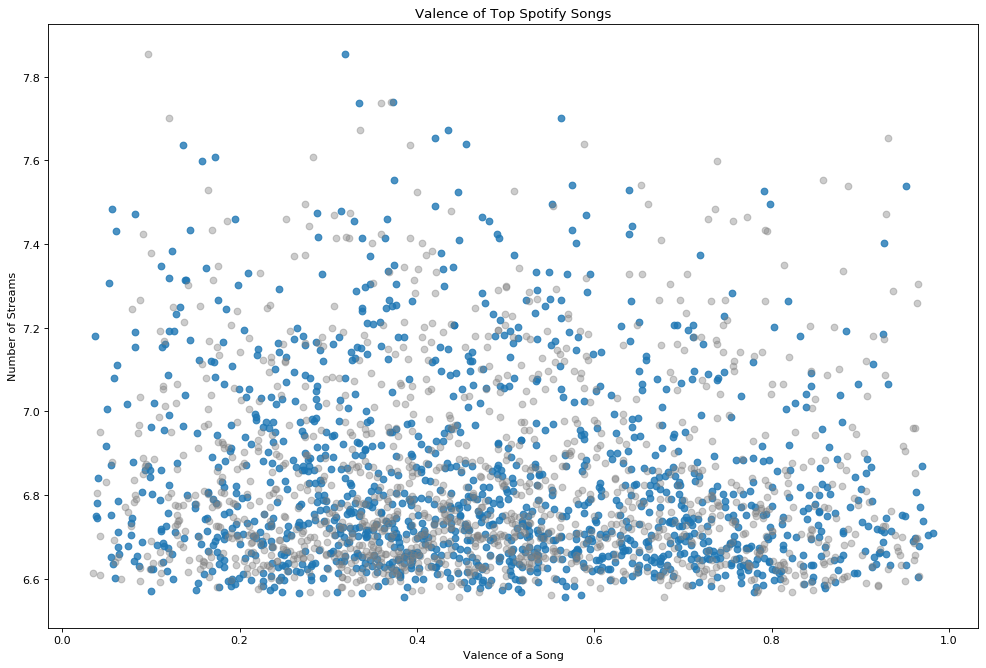

Old valence correlation: 0.0591137082325
Current valence correlation: -0.12870523535091347
t_val: -12.012396995896939
p_val: 1.1833037471631835e-32
We have evidence to reject the null hypothesis. It's significantly different.


<Figure size 432x288 with 0 Axes>

In [49]:
#scatter plot
plt.figure(figsize=(15, 10), dpi=80)

#get current data
x = df['valence']
y = np.log10(df['Streams'])

#get old data
x_old = df_old['valence']
y_old = np.log10(df_old['Total'] *(df['Streams'] / df_old['Total']))

#set plot attributes
plt.figure(figsize=(15, 10), dpi=80)
plt.title('Valence of Top Spotify Songs')
plt.xlabel('Valence of a Song')
plt.ylabel('Number of Streams')

#plot data
plt.scatter(x,y, alpha = .8,)
plt.scatter(x = x_old, y = y_old, c='grey', alpha = 0.4)
plt.show()
valence = plt.gcf()

#old correlation
print("Old valence correlation: 0.0591137082325")

#current correlation
valencecorrelation = np.corrcoef(x,y)[0,1]
print("Current valence correlation:", valencecorrelation)

# scaled x and x_old
scaled_x = df['valence'] * df['Streams']
scaled_x_old = df_old['valence'] * df_old['Total']

# Get T-values 
t_val = stats.ttest_ind(scaled_x, scaled_x_old)[0]
p_val = stats.ttest_ind(scaled_x, scaled_x_old)[1]

print('t_val:', t_val)
print('p_val:', p_val)
check_p_val(p_val, alpha=0.01)

This graph overlay indicates that there is a high degree of variance among valence values; across both datasets, values range from 0.0 to 1.0, with a concentration of values around 0.4. Interestingly, the current correlation is approximately 0.19 more negative than the old correlation, meaning that the songs with the most streams are more likely to be negative as compared to previous years. The t-test indicates that the difference between the two distribution is statistically significant. 

Old valence mean: 0.4742959207920787
Current valence mean: 0.4789549141965686
Old valence standard deviation: 0.22750259541890794
Current valence standard deviation: 0.2237528019685795
Normal Test Statistic: 121.2120133302906
Normal Test P-value: 4.776895438758112e-27


Text(0.5, 1.0, 'Valence of Top Spotify Songs')

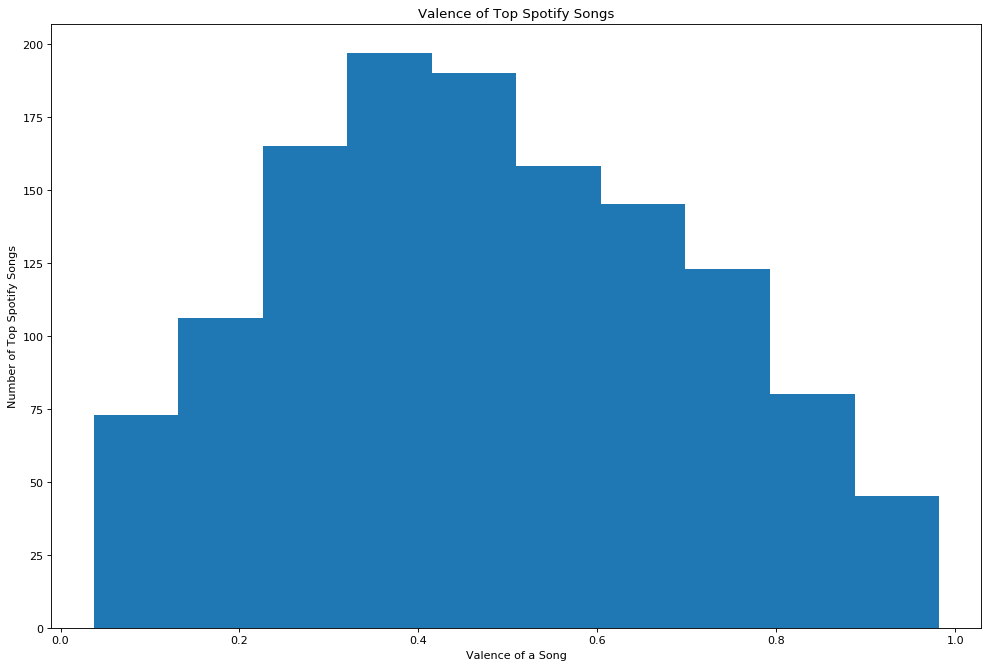

In [50]:
print("Old valence mean:", df_old['valence'].mean())
print("Current valence mean:", df['valence'].mean())
print("Old valence standard deviation:", df_old['valence'].std())
print("Current valence standard deviation:", df['valence'].std())
st_valence = stats.normaltest(df['valence'])[0]
p_valence = stats.normaltest(df['valence'])[1]
print("Normal Test Statistic:", st_valence)
print("Normal Test P-value:", p_valence)
plt.figure(figsize=(15, 10), dpi=80)
plt.hist(df['valence'])
plt.xlabel('Valence of a Song')
plt.ylabel('Number of Top Spotify Songs')
plt.title('Valence of Top Spotify Songs')

This distribution indicates that the 0.4-0.5 are the most common valence values for top-ranked Spotify songs. However, there is a substantial amount of variance. Interestingly, the mean and standard deviations for valence within the past year were extremely close to those for previous years (within 0.01). However, the substantial difference in correlations as well as the positive t-test result leads us to conclude that although overall valence has not changed significantly across both datasets, the most top-ranked songs are more likely to have negative valence as compared to previous years. 

## Tempo

<Figure size 1200x800 with 0 Axes>

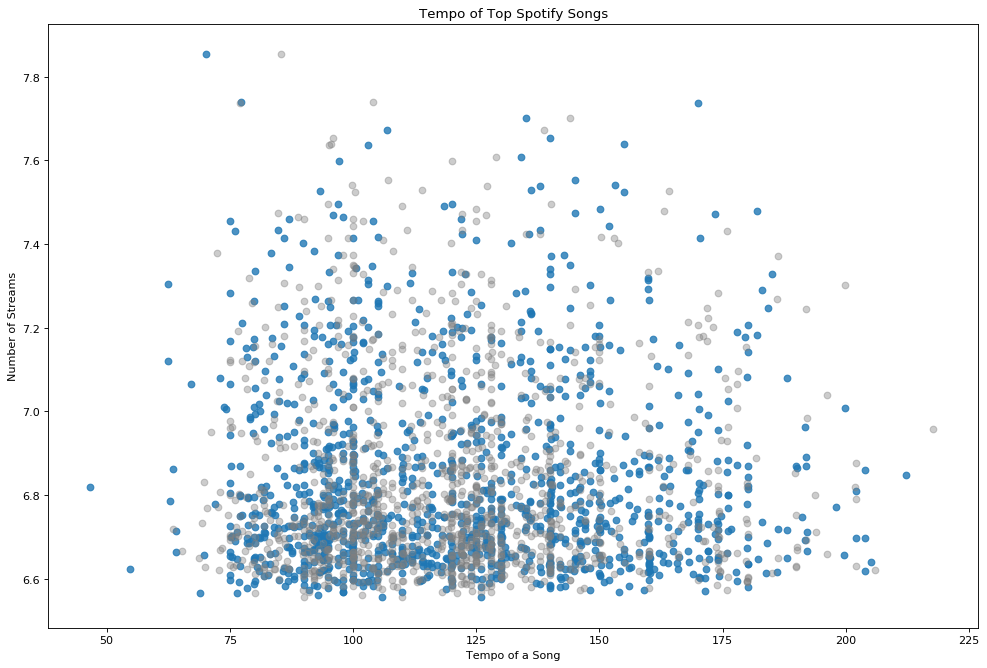

Old tempo correlation: -0.0188053852214
Current tempo correlation: -0.021435178024391266
t_val: -13.180022491551368
p_val: 8.010297938964615e-39
We have evidence to reject the null hypothesis. It's significantly different.


<Figure size 432x288 with 0 Axes>

In [51]:
#scatter plot
plt.figure(figsize=(15, 10), dpi=80)

#get current data
x = df['tempo']
y = np.log10(df['Streams'])

#get old data
x_old = df_old['tempo']
y_old = np.log10(df_old['Total'] *(df['Streams'] / df_old['Total']))

#set plot attributes
plt.figure(figsize=(15, 10), dpi=80)
plt.title('Tempo of Top Spotify Songs')
plt.xlabel('Tempo of a Song')
plt.ylabel('Number of Streams')

#plot data
plt.scatter(x,y, alpha = .8,)
plt.scatter(x = x_old, y = y_old, c='grey', alpha = 0.4)
plt.show()
tempo = plt.gcf()

#old correlation
print("Old tempo correlation: -0.0188053852214")

#current correlation
tempocorrelation = np.corrcoef(x,y)[0,1]
print("Current tempo correlation:", tempocorrelation)

# scaled x and x_old
scaled_x = df['tempo'] * df['Streams']
scaled_x_old = df_old['tempo'] * df_old['Total']

# Get T-values 
t_val = stats.ttest_ind(scaled_x, scaled_x_old)[0]
p_val = stats.ttest_ind(scaled_x, scaled_x_old)[1]

print('t_val:', t_val)
print('p_val:', p_val)
check_p_val(p_val, alpha=0.01)

This graph indicates that the majority of songs across both datasets have tempo values between 75 and 175. There are several outliers across both datasets at 50 and 220. The difference between the correlations is minimal, 0.01, and they both indicate no correlation between tempo and streams. The t-test indicates that the difference between the distribution are significantly different. 

Old tempo mean: 120.15712633663375
Current tempo mean: 121.6020686427455
Old tempo standard deviation: 27.85306376775582
Current tempo standard deviation: 29.940840451774154
Normal Test Statistic: 70.7465983886014
Normal Test P-value: 4.340815760090876e-16


Text(0.5, 1.0, 'Tempo of Top Spotify Songs')

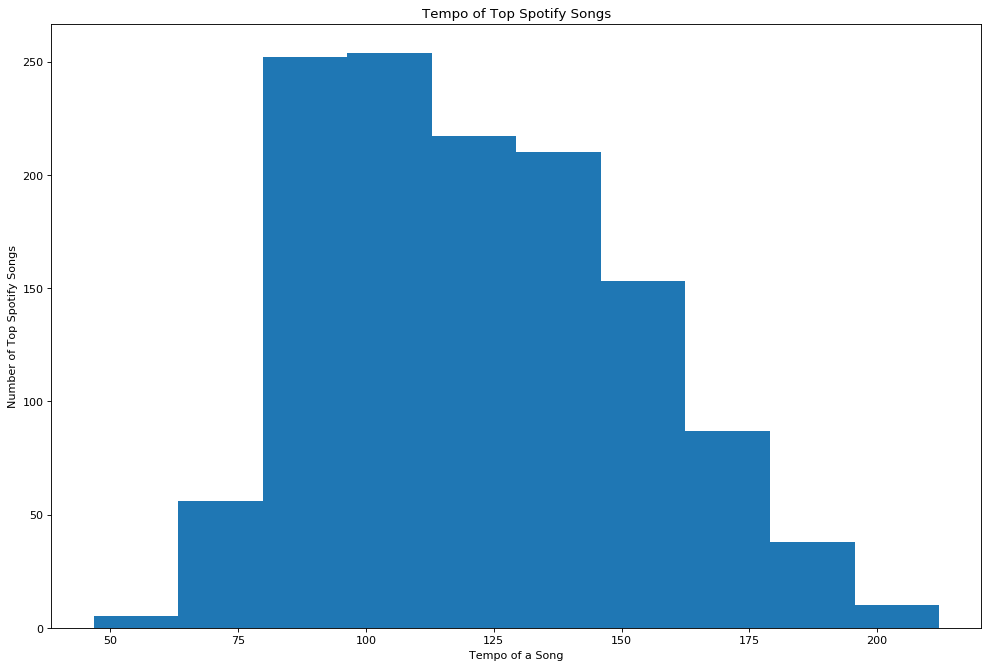

In [52]:
print("Old tempo mean:", df_old['tempo'].mean())
print("Current tempo mean:", df['tempo'].mean())
print("Old tempo standard deviation:", df_old['tempo'].std())
print("Current tempo standard deviation:", df['tempo'].std())
st_tempo = stats.normaltest(df['tempo'])[0]
p_tempo = stats.normaltest(df['tempo'])[1]
print("Normal Test Statistic:", st_tempo)
print("Normal Test P-value:", p_tempo)
plt.figure(figsize=(15, 10), dpi=80)
plt.hist(df['tempo'])
plt.xlabel('Tempo of a Song')
plt.ylabel('Number of Top Spotify Songs')
plt.title('Tempo of Top Spotify Songs')

This distribution indicates tempo values between 80 and 120 are the most popular. The current tempo mean, 121.6, is 1.5 more than the old tempo mean of 120.1. Though the t-test does indicate a statistically significant difference between the two distributions, this could be due to the more substantial difference in variance as compared to mean, so we cannot conclude that the tempo within the past year is higher than previous years. 

## Mode: Further Analysis

We decided to conduct further analyses to understand whether there were correlations between mode and other musical attributes. Throughout our analysis, we used the Kolmogorov-Smirnov test rather than the t-test to compare the distributions because we did not have normally distributed inputs. 

In [53]:
def check_p_val(p_val, alpha):

    if p_val < alpha:
        print("We have evidence to reject the null hypothesis. It's significantly different.")
    else:
        print("We do not have evidence to reject the null hypothesis. It's not significantly different.")

In [54]:
major = df[df['mode'] == 1]
minor = df[df['mode'] == 0]
yM = np.log10(major['Streams'])
ym = np.log10(minor['Streams'])

Statistic: 	0.07 
P-Value: 	9.61e-02

We do not have evidence to reject the null hypothesis. It's not significantly different.


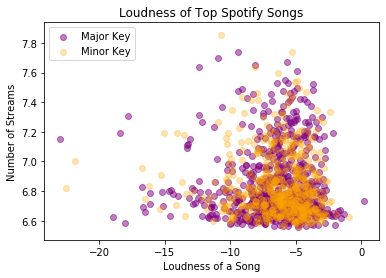

In [55]:
plt.scatter(major['loudness'], yM, c='purple', alpha=.5, label='Major Key')
plt.scatter(minor['loudness'], ym, c='orange', alpha=.3, label='Minor Key')
plt.title('Loudness of Top Spotify Songs')
plt.legend()
plt.xlabel('Loudness of a Song')
plt.ylabel('Number of Streams')

stat, p_val = stats.ks_2samp(major['loudness'].values, minor['loudness'].values)
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.01)

The ks-test indicates that there is not a statistically significant difference between the two distributions. For this reason, we conclude that differences in mode do not correlate with differences in loudness.

Statistic: 	0.04 
P-Value: 	7.54e-01

We do not have evidence to reject the null hypothesis. It's not significantly different.


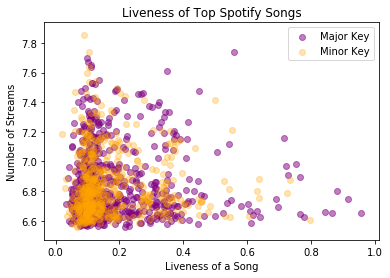

In [56]:
plt.scatter(major['liveness'], yM, c='purple', alpha=.5, label='Major Key')
plt.scatter(minor['liveness'], ym, c='orange', alpha=.3, label='Minor Key')
plt.title('Liveness of Top Spotify Songs')
plt.legend()
plt.xlabel('Liveness of a Song')
plt.ylabel('Number of Streams')

stat, p_val = stats.ks_2samp(major['liveness'].values, minor['liveness'].values)
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.01)

The ks-test indicates that there is not a statistically significant difference between the two distributions. For this reason, we conclude that differences in mode do not correlate with differences in liveness.

Statistic: 	0.05 
P-Value: 	5.24e-01

We do not have evidence to reject the null hypothesis. It's not significantly different.


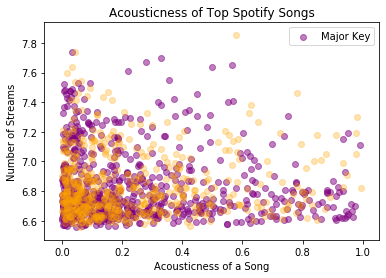

In [57]:
plt.scatter(major['acousticness'], yM, c='purple', alpha=.5, label='Major Key')
plt.scatter(minor['acousticness'], ym, c='orange', alpha=.3, marker='o')
plt.title('Acousticness of Top Spotify Songs')
plt.legend()
plt.xlabel('Acousticness of a Song')
plt.ylabel('Number of Streams')

stat, p_val = stats.ks_2samp(major['acousticness'].values, minor['acousticness'].values)
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.01)

The ks-test indicates that there is not a statistically significant difference between the two distributions. For this reason, we conclude that differences in mode do not correlate with differences in acousticness.

Statistic: 	0.13 
P-Value: 	5.86e-05

We have evidence to reject the null hypothesis. It's significantly different.
Mean danceability values for major key: 0.678267567567567
Mean danceability values for minor key: 0.7062988929889303


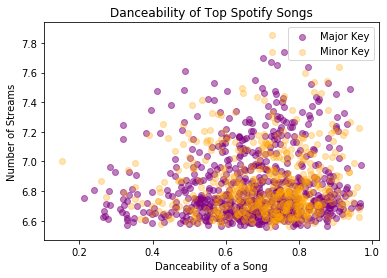

In [58]:
plt.scatter(major['danceability'], yM, c='purple', alpha=.5, label='Major Key')
plt.scatter(minor['danceability'], ym, c='orange', alpha=.3, label='Minor Key')
plt.title('Danceability of Top Spotify Songs')
plt.legend()
plt.xlabel('Danceability of a Song')
plt.ylabel('Number of Streams')

stat, p_val = stats.ks_2samp(major['danceability'].values, minor['danceability'].values)
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.01)

print("Mean danceability values for major key:", major['danceability'].mean())
print("Mean danceability values for minor key:", minor['danceability'].mean())

The ks-test indicates a statistically significant difference between the two distributions and the mean for danceability values for songs with minor keys is 0.028 larger than that of major keys. For this reason, we conclude that songs with a minor key are more likely to be more "danceable."

Statistic: 	0.07 
P-Value: 	7.29e-02

We do not have evidence to reject the null hypothesis. It's not significantly different.


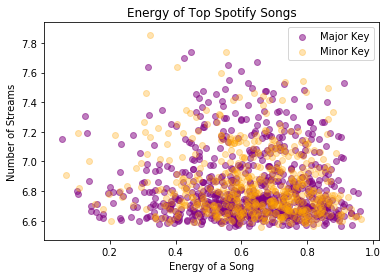

In [59]:
plt.scatter(major['energy'], yM, c='purple', alpha=.5, label='Major Key')
plt.scatter(minor['energy'], ym, c='orange', alpha=.3, label='Minor Key')
plt.title('Energy of Top Spotify Songs')
plt.legend()
plt.xlabel('Energy of a Song')
plt.ylabel('Number of Streams')

stat, p_val = stats.ks_2samp(major['energy'].values, minor['energy'].values)
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.01)

The ks-test indicates that there is not a statistically significant difference between the two distributions. For this reason, we conclude that differences in mode do not correlate with differences in energy.

Statistic: 	0.08 
P-Value: 	4.67e-02

We do not have evidence to reject the null hypothesis. It's not significantly different.


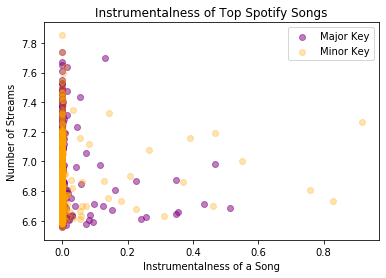

In [60]:
plt.scatter(major['instrumentalness'], yM, c='purple', alpha=.5, label='Major Key')
plt.scatter(minor['instrumentalness'], ym, c='orange', alpha=.3, label='Minor Key')
plt.title('Instrumentalness of Top Spotify Songs')
plt.legend()
plt.xlabel('Instrumentalness of a Song')
plt.ylabel('Number of Streams')

stat, p_val = stats.ks_2samp(major['instrumentalness'].values, minor['instrumentalness'].values)
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.01)

The ks-test indicates that there is not a statistically significant difference between the two distributions. For this reason, we conclude that differences in mode do not correlate with differences in instrumentalness.

Statistic: 	0.08 
P-Value: 	3.15e-02

We do not have evidence to reject the null hypothesis. It's not significantly different.


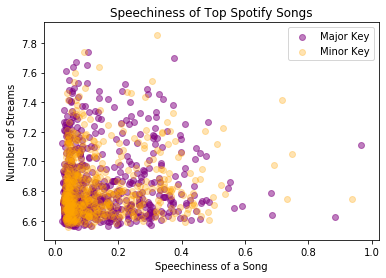

In [61]:
plt.scatter(major['speechiness'], yM, c='purple', alpha=.5, label='Major Key')
plt.scatter(minor['speechiness'], ym, c='orange', alpha=.3, label='Minor Key')
plt.title('Speechiness of Top Spotify Songs')
plt.legend()
plt.xlabel('Speechiness of a Song')
plt.ylabel('Number of Streams')

stat, p_val = stats.ks_2samp(major['speechiness'].values, minor['speechiness'].values)
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.01)

The ks-test indicates that there is not a statistically significant difference between the two distributions. For this reason, we conclude that differences in mode do not correlate with differences in speechiness.

Statistic: 	0.04 
P-Value: 	7.60e-01

We do not have evidence to reject the null hypothesis. It's not significantly different.


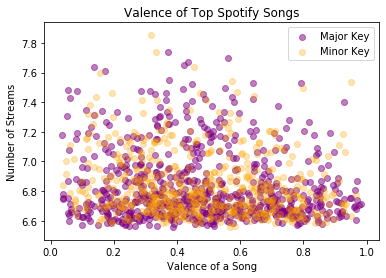

In [62]:
plt.scatter(major['valence'], yM, c='purple', alpha=.5, label='Major Key')
plt.scatter(minor['valence'], ym, c='orange', alpha=.3, label='Minor Key')
plt.title('Valence of Top Spotify Songs')
plt.legend()
plt.xlabel('Valence of a Song')
plt.ylabel('Number of Streams')

stat, p_val = stats.ks_2samp(major['valence'].values, minor['valence'].values)
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.01)

The ks-test indicates that there is not a statistically significant difference between the two distributions. For this reason, we conclude that differences in mode do not correlate with differences in valence.

Statistic: 	0.04 
P-Value: 	5.46e-01

We do not have evidence to reject the null hypothesis. It's not significantly different.


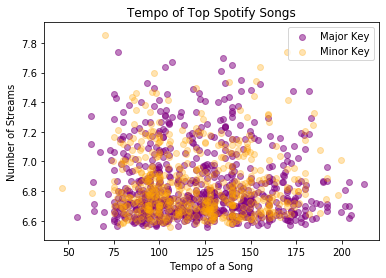

In [63]:
plt.scatter(major['tempo'], yM, c='purple', alpha=.5, label='Major Key')
plt.scatter(minor['tempo'], ym, c='orange', alpha=.3, label='Minor Key')
plt.title('Tempo of Top Spotify Songs')
plt.legend()
plt.xlabel('Tempo of a Song')
plt.ylabel('Number of Streams')

stat, p_val = stats.ks_2samp(major['tempo'].values, minor['tempo'].values)
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.01)

The ks-test indicates that there is not a statistically significant difference between the two distributions. For this reason, we conclude that differences in mode do not correlate with differences in tempo.

# Ethics & Privacy

In terms of our data, there is not much concern about how we acquired the data from the past year of Spotify charts. Spotify provided a script for getting audio features for one of their tracks and we obtained charts as well from Spotify.  Since the data was openly accessible through Spotify, any observations we make about the songs and their attributes would not reflect more negatively on the musicians and songs than what is already present. Our use of the data is purely non-commercial, so there is no issue with acquiring the open sourced data of songs.

The fact that we are only using Spotify databases to consider popular songs can be a concern. First of all, Spotify databases are highly dependent on internet activity, so the ranking and usage data would only represent a population that has access to Spotify and uses it. The rankings do not account for radio and other non-Spotify listening rates and we completely ignore music that has not made Spotify's daily rankings.  Our conclusions are potentially less accurate on a larger scale of ranking since they are taken from a very particular audience and so we were only able to consider our observations for Spotify's popular music.  Second of all, all the group members use Spotify.  This is also a concern because this bias could influence how we conducted the analysis by assumptions we already have about Spotify and its charts.

Because the daily song rankings are taken from only a year span, there was also a concern about the the reliability of observations over all-time.  Because the data is found on newer technology and the time span is relatively constricted, it doesn't sample older charts and the scale is small. This could definitely make our observations less accurate on a longer time scale, so we could not make observations on all ranked songs over all-time. 

We also compared our data to a previous group's data, so any ethical concerns they may have had could have influenced the comparison aspect of our analysis. If there is an ethical problem with their results, then it will definitely affect the ethics of our own project.

There is not much else to consider. Spotify provides the audio attributes for each song and there are no ethical concerns with the classifications of music attributes into aspects like danceability or mode. Positive or negative valence may be a concerning
classification, but there is no direct harm to the artists or songs.

# Conclusion & Discussion

With regards to the predictions made in our hypothesis, we were correct in predicting that popular songs on Spotify had high danceability and energy, and had low acousticness, liveness, and instrumentalness. We were incorrect in predicting that popular songs on Spotify had high speechiness; speechiness values are low for top-ranked songs on Spotify. Our prediction for the mean duration of songs, 3 minutes, was somewhat close to the observed mean of 3 minutes and 24 seconds. We correctly predicted that major keys were more popular than minor keys and that C major would be a popular key, but incorrectly predicted D major as a popular key. In fact, D major is the least popular key. 

Consistent with the results of previous group, we found that popular songs on Spotify had high danceability and energy, low speechiness, acousticness, instrumentalness, liveness, an average tempo of around 120 bpm, an average valence values of around 0.47, and a large amount of songs with a key of C and a small amount of songs with a key of C. However, by comparing means, variances, and using t-tests, we were able to find several interesting differences between the two datasets. We found that acousticness was slightly more popular within the past year as compared to previous years. We found that songs within the past year are significantly more "danceable" than those of previous years, which matches the prediction made in our hypothesis. However, we found that energy values were slightly lower within the past year, which disproves the prediction we made in our hypothesis. We found that the mean duration of songs within the past year was 20 seconds shorter than that of previous years (3 minutes 24 seconds vs 3 minutes 44 seconds). Unlike the previous group's findings, we found a substantially smaller proportion of streams that use the keys D#, E♭ and a substantially larger proportion of streams that use the key of A. We found that top-ranked songs within the past year were, on average, slightly louder than those of previous years, which matches the prediction we made in our hypothesis. We found that songs within the past year had moderately higher speechiness values than those of previous years, which matches the prediction made in our hypothesis. We found that although overall valence has not changed significantly, the most top-ranked songs are more likely to have negative valence as compared to previous years. We found no statistically significant differences between the two datasets in regards to instrumentalness, liveness, and tempo. 

Our further analysis of mode found only one statistically significant result; using the ks-test we found a statistically significant difference between the distributions of the danceability values of songs with major and minor keys. We were able to conclude that popular songs with a minor key are more likely to be "danceable." 